# PIBIC - Modelos de Regressão e Classificação

## 1 Autenticando no Google Drive

Para acessar os datasets é necessário montar o ambiente do Google Drive dentro do Google Colab Research.

Para isso podemos importar o `drive` de dentro do módulo `google.colab`. Será solicitado que você click numa URL, entre com suas credenciais da Conta Google, copie um código de autorização gerado e cole-o no campo abaixo:

In [0]:
# import from your drive
from google.colab import drive

drive.mount('/content/drive/')
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
drive/  sample_data/


Com o drive montando, podemos então navegar até a pasta onde se encontram os datasets utilizando o comando `%cd`:

In [0]:
%cd /
%cd 'content/drive/My Drive/IE08-Ciência da Computação/pibic-marcos-dificuldade-questoes/csv/'
%ls

/
/content/drive/My Drive/IE08-Ciência da Computação/pibic-marcos-dificuldade-questoes/csv
atividades-2016.csv  estudantes-2016.csv  execucoes.csv       solucoes.csv
atividades.csv       estudantes.csv       exercises_mean.csv  turmas-2016.csv
erros-2016.csv       exams.csv            periodos-2016.csv   turmas.csv
erros.csv            execucoes-2016.csv   periodos.csv


## 2 Módulos Necessários

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# configura a quantidade de colunas exibidas nas células
pd.set_option('display.max_columns', 80)

# tema dark
plt.style.use('seaborn-dark')
sns.set(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# check modules version
np.__version__, pd.__version__, mpl.__version__, sns.__version__

('1.18.4', '1.0.3', '3.2.1', '0.10.1')

## 3 Carregando os Datasets

### 3.1 Dataset de Atividades

In [0]:
df_at = pd.read_csv('atividades.csv', index_col=False)
df_at.name = 'Dataframe Atividades'
df_at.head()

periodo  turma  codigo                                          titulo  \
0  2019-2    264    1977  TP 01: Variáveis e Estrutura Sequencial (2019)   
1  2019-2    264    2028  Lab 3 – Estrutura Condicional Encadeada (2019)   
2  2019-2    264    1994     Desafios 2 - Estruturas Condicionais (2019)   
3  2019-2    264    1906    Lab 0 – Primeiros passos com o Python - 2019   
4  2019-2    264    1985    Lab 2 – Estrutura Condicional Simples (2019)   

        data_inicio      data_termino linguagem      tipo  peso  n_blocos  \
0  2019-09-02 08:00  2019-09-02 09:50  Python 3      exam   1.0         3   
1  2019-09-18 08:00  2019-09-30 08:00  Python 3  homework   1.0        12   
2  2019-09-09 10:00  2019-12-09 08:00  Python 3  homework   1.0         8   
3  2019-08-12 08:00  2019-09-02 08:00  Python 3  homework   1.0        16   
4  2019-09-04 08:00  2019-09-16 07:59  Python 3  homework   1.0        12   

                                              blocos  
0  [[1027, 1028, 1029, 1030, 1031, 1032, 3309], [...  
1  [[1079, 1099], 1100, 1103, 1104, 1101, 1872, 1...  
2    [2449, 652, 1092, 2971, 1879, 1418, 1397, 1395]  
3  [994, 996, 1326, 1327, 1328, 1329, 1330, 1331,...  
4  [2442, 3335, 1054, 2447, 869, 1053, 2445, 2969...

### 3.2 Dataset de Soluções dos Exercícios

In [0]:
tipos = {
    'codigo': np.uint16,
    'complexity': np.uint8,
    'loc': np.uint8,
    'lloc': np.uint8,
    'single_comments': np.uint8,
    'comments': np.uint8,
    'multilines': np.uint8,
    'blank_lines': np.uint8,
    'h1': np.uint8,
    'h2': np.uint8,
    'N1': np.uint8,
    'N2': np.uint8,
    'h': np.uint8,
    'N': np.uint8,
    'calculated_N': np.float,
    'volume': np.float,
    'difficulty': np.float,
    'effort': np.float,
    'bugs': np.float,
    'time': np.float
}
df_s = pd.read_csv('solucoes.csv', dtype=tipos, index_col=False)
df_s.name = 'Dataframe Soluções dos Exercícios'
df_s.head()

codigo  complexity  n_classes  n_functions  loc  lloc  sloc  \
0    2455           3          0            0   12    10    10   
1    1053           2          0            0    8     6     6   
2    1014           1          0            0   12     4     3   
3    3031           6          0            0   19    11    10   
4    2461           6          0            0   23    11    10   

   single_comments  comments  multilines  blank_lines  h1  h2  N1  N2   h   N  \
0                0         0           0            2   2   7   5  10   9  15   
1                0         0           0            2   2   3   2   4   5   6   
2                0         0           5            4   1   2   1   2   3   3   
3                0         0           5            4   4   8   9  18  12  27   
4                2         2           8            3   4  12  11  22  16  33   

   calculated_N      volume  difficulty      effort      bugs       time  \
0     21.651484   47.548875    1.428571   67.926964  0.015850   3.773720   
1      6.754888   13.931569    1.333333   18.575425  0.004644   1.031968   
2      2.000000    4.754888    0.500000    2.377444  0.001585   0.132080   
3     32.000000   96.793988    4.500000  435.572944  0.032265  24.198497   
4     51.019550  132.000000    3.666667  484.000000  0.044000  26.888889   

   imports  assignments  assignments_unique  keywords  keywords_unique  \
0        0            5                   1         4                2   
1        0            3                   1         2                2   
2        0            2                   1         0                0   
3        0            5                   1         6                4   
4        0            5                   1         6                4   

   literal_numbers  literal_strings  literal_booleans  logical_op  \
0                6                2                 0           0   
1                0                3                 0           0   
2                2                2                 0           0   
3               10                2                 0           2   
4               10                2                 0           2   

   logical_op_unique  arithmetic_op  arithmetic_op_unique  comparison_op  \
0                  0              3                     1              2   
1                  0              1                     1              1   
2                  0              1                     1              0   
3                  1              2                     1              5   
4                  1              4                     1              5   

   comparison_op_unique  bitwise_op  bitwise_op_unique  identity_op  \
0                     1           0                  0            0   
1                     1           0                  0            0   
2                     0           0                  0            0   
3                     2           0                  0            0   
4                     2           0                  0            0   

   membership_op  conditionals  loops  loop_control  builtin_f  \
0              0             4      0             0          6   
1              0             2      0             0          2   
2              0             0      0             0          4   
3              0             4      0             0          4   
4              0             4      0             0          4   

   builtin_f_unique  type_f  type_f_unique  lambdas  lpar  rpar  prints  \
0                 5       2              2        0     8     8       1   
1                 2       0              0        0     2     2       1   
2                 4       1              1        0     4     4       1   
3                 4       1              1        0     7     7       1   
4                 4       1              1        0     7     7       1   

   inputs  
0       2  
1       1  
2       1  
3       1  
4       1

In [0]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   codigo                660 non-null    uint16 
 1   complexity            660 non-null    uint8  
 2   n_classes             660 non-null    int64  
 3   n_functions           660 non-null    int64  
 4   loc                   660 non-null    uint8  
 5   lloc                  660 non-null    uint8  
 6   sloc                  660 non-null    int64  
 7   single_comments       660 non-null    uint8  
 8   comments              660 non-null    uint8  
 9   multilines            660 non-null    uint8  
 10  blank_lines           660 non-null    uint8  
 11  h1                    660 non-null    uint8  
 12  h2                    660 non-null    uint8  
 13  N1                    660 non-null    uint8  
 14  N2                    660 non-null    uint8  
 15  h                     6

### 3.3 Dataset de Execuções dos Estudantes

In [0]:
tipos = {
    'periodo': 'category',
    'turma': np.uint16,
    'estudante': np.uint16,
    'atividade': np.uint16,
    'exercicio': np.uint16,
    'n_submissoes': np.uint16,
    'n_testes': np.uint16,
    'n_erros': np.uint16
}
df_ex = pd.read_csv('execucoes.csv', dtype=tipos, index_col=False)
df_ex.name = 'Dataframe Execuções'
df_ex.head()

periodo  turma  estudante  atividade  exercicio     tempo_total  \
0  2019-2    264       1518       1958       1803  0:34:50.069000   
1  2019-2    264       1518       1941       1570  0:00:55.630000   
2  2019-2    264       1518       1985       3334  0:19:37.335000   
3  2019-2    264       1518       1985       2447  0:15:12.168000   
4  2019-2    264       1518       1941        825  0:03:34.598000   

       tempo_foco  n_submissoes  n_testes  n_erros  t_execucao  nota_final  \
0  0:11:16.716000             2         1        0    0.707368       100.0   
1  0:00:55.630000             1         1        0    0.701366       100.0   
2  0:19:37.335000             2         7        2    0.795583       100.0   
3  0:15:12.168000             4        10        5    0.653181       100.0   
4  0:03:34.598000             1         1        0    0.760246       100.0   

  acertou  complexity  n_classes  n_functions   loc  lloc  sloc  \
0    True         1.0        0.0          0.0  13.0   7.0   7.0   
1    True         1.0        0.0          0.0   7.0   2.0   2.0   
2    True         2.0        0.0          0.0  15.0  11.0  11.0   
3    True         2.0        0.0          0.0  11.0  10.0  10.0   
4    True         1.0        0.0          0.0  12.0   6.0   6.0   

   single_comments  comments  multilines  blank_lines   h1    h2    N1    N2  \
0              0.0       0.0         0.0          6.0  4.0  22.0  14.0  28.0   
1              3.0       3.0         0.0          2.0  0.0   0.0   0.0   0.0   
2              0.0       0.0         0.0          4.0  7.0  19.0  15.0  28.0   
3              0.0       0.0         0.0          1.0  2.0   2.0   3.0   6.0   
4              3.0       3.0         0.0          3.0  3.0   9.0   6.0  12.0   

      h     N  calculated_N      volume  difficulty       effort      bugs  \
0  26.0  42.0    106.107496  197.418468    2.545455   502.519737  0.065806   
1   0.0   0.0      0.000000    0.000000    0.000000     0.000000  0.000000   
2  26.0  43.0    100.362107  202.118908    5.157895  1042.508051  0.067373   
3   4.0   9.0      4.000000   18.000000    3.000000    54.000000  0.006000   
4  12.0  18.0     33.284213   64.529325    2.000000   129.058650  0.021510   

        time  imports  assignments  assignments_unique  keywords  \
0  27.917763      0.0          6.0                 1.0       0.0   
1   0.000000      0.0          1.0                 1.0       0.0   
2  57.917114      0.0          6.0                 1.0       2.0   
3   3.000000      0.0          6.0                 1.0       2.0   
4   7.169925      1.0          3.0                 1.0       2.0   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0              0.0             11.0              1.0               0.0   
1              0.0              0.0              1.0               0.0   
2              2.0              7.0              4.0               0.0   
3              2.0              2.0              4.0               0.0   
4              2.0              6.0              1.0               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0         0.0                0.0           14.0                   4.0   
1         0.0                0.0            0.0                   0.0   
2         0.0                0.0           14.0                   5.0   
3         0.0                0.0            2.0                   1.0   
4         0.0                0.0            7.0                   3.0   

   comparison_op  comparison_op_unique  bitwise_op  bitwise_op_unique  \
0            0.0                   0.0         0.0                0.0   
1            0.0                   0.0         0.0                0.0   
2            1.0                   1.0         0.0                0.0   
3            1.0                   1.0         0.0                0.0   
4            0.0                   0.0         0.0                0.0   

   identity_op  membership_op  co

In [0]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161125 entries, 0 to 161124
Data columns (total 65 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   periodo               161125 non-null  category
 1   turma                 161125 non-null  uint16  
 2   estudante             161125 non-null  uint16  
 3   atividade             161125 non-null  uint16  
 4   exercicio             161125 non-null  uint16  
 5   tempo_total           161047 non-null  object  
 6   tempo_foco            161047 non-null  object  
 7   n_submissoes          161125 non-null  uint16  
 8   n_testes              161125 non-null  uint16  
 9   n_erros               161125 non-null  uint16  
 10  t_execucao            112707 non-null  float64 
 11  nota_final            161125 non-null  float64 
 12  acertou               152620 non-null  object  
 13  complexity            145190 non-null  float64 
 14  n_classes             145190 non-nul

Existem alguns `missing-values` nas features: `acertou`, `n_classe`, `n_function`.

In [0]:
df_ex['n_classes'].fillna(0, inplace=True)
df_ex['n_functions'].fillna(0, inplace=True)
df_ex['acertou'].fillna(False, inplace=True)
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161125 entries, 0 to 161124
Data columns (total 65 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   periodo               161125 non-null  category
 1   turma                 161125 non-null  uint16  
 2   estudante             161125 non-null  uint16  
 3   atividade             161125 non-null  uint16  
 4   exercicio             161125 non-null  uint16  
 5   tempo_total           161047 non-null  object  
 6   tempo_foco            161047 non-null  object  
 7   n_submissoes          161125 non-null  uint16  
 8   n_testes              161125 non-null  uint16  
 9   n_erros               161125 non-null  uint16  
 10  t_execucao            112707 non-null  float64 
 11  nota_final            161125 non-null  float64 
 12  acertou               161125 non-null  bool    
 13  complexity            145190 non-null  float64 
 14  n_classes             161125 non-nul

## 4 Processamento dos Dados

### 4.1 Recuperando somentes as submissões/testes em exames

In [0]:
# obtendo o código das atividades do tipo 'exam'
exam_codes = df_at[df_at.tipo == 'exam'].codigo.unique()
exam_codes.size

312

In [0]:
# filtrando as submissões/testes que ocorreram em exames
exams = df_ex[df_ex.atividade.isin(exam_codes)]
exams.head()

periodo  turma  estudante  atividade  exercicio     tempo_total  \
14  2019-2    264       1518       1977       1029  0:08:23.874000   
23  2019-2    264       1518       1977       1349  0:08:42.671000   
26  2019-2    264       1518       1977       1366  0:13:53.982000   
34  2019-2    264       1518       2019       1084  0:04:50.880000   
52  2019-2    264       1518       2019       3386  0:26:20.773000   

        tempo_foco  n_submissoes  n_testes  n_erros  t_execucao  nota_final  \
14  0:08:23.874000             4         3        6    1.008860       100.0   
23  0:08:42.671000             3         6        4    0.777066       100.0   
26  0:13:53.982000             3        13        8    0.593172       100.0   
34  0:04:50.880000             2         2        0    0.678850       100.0   
52  0:26:20.773000             4        26       10    0.861745       100.0   

    acertou  complexity  n_classes  n_functions   loc  lloc  sloc  \
14     True         1.0        0.0          0.0   7.0   4.0   4.0   
23     True         1.0        0.0          0.0  10.0   6.0   6.0   
26     True         1.0        0.0          0.0  10.0   5.0   5.0   
34     True         2.0        0.0          0.0  17.0  11.0  11.0   
52     True         2.0        0.0          0.0  16.0   9.0   9.0   

    single_comments  comments  multilines  blank_lines   h1    h2   N1    N2  \
14              0.0       0.0         0.0          3.0  2.0   9.0  6.0  12.0   
23              0.0       0.0         0.0          4.0  4.0  12.0  6.0  12.0   
26              0.0       0.0         0.0          5.0  3.0   7.0  4.0   8.0   
34              0.0       0.0         0.0          6.0  3.0  10.0  5.0  10.0   
52              0.0       0.0         0.0          7.0  3.0   4.0  3.0   6.0   

       h     N  calculated_N     volume  difficulty      effort      bugs  \
14  11.0  18.0     30.529325  62.269769    1.333333   83.026359  0.020757   
23  16.0  18.0     51.019550  72.000000    2.000000  144.000000  0.024000   
26  10.0  12.0     24.406372  39.863137    1.714286   68.336807  0.013288   
34  13.0  15.0     37.974168  55.506596    1.500000   83.259894  0.018502   
52   7.0   9.0     12.754888  25.266194    2.250000   56.848937  0.008422   

        time  imports  assignments  assignments_unique  keywords  \
14  4.612575      0.0          3.0                 1.0       0.0   
23  8.000000      1.0          4.0                 1.0       2.0   
26  3.796489      1.0          3.0                 1.0       2.0   
34  4.625550      0.0          5.0                 1.0       2.0   
52  3.158274      0.0          5.0                 1.0       2.0   

    keywords_unique  literal_numbers  literal_strings  literal_booleans  \
14              0.0              6.0              1.0               0.0   
23              2.0              5.0              2.0               0.0   
26              2.0              4.0              2.0               0.0   
34              2.0              4.0              6.0               0.0   
52              2.0              4.0              4.0               0.0   

    logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
14         0.0                0.0            6.0                   2.0   
23         0.0                0.0            7.0                   4.0   
26         0.0                0.0            5.0                   3.0   
34         0.0                0.0            4.0                   2.0   
52         0.0                0.0            2.0                   2.0   

    comparison_op  comparison_op_unique  bitwise_op  bitwise_op_unique  \
14            0.0                   0.0         0.0                0.0   
23            0.0                   0.0         0.0                0.0   
26            0.0                   0.0         0.0                0.0   
34            1.0                   1.0         0.0                0.0   
52            1.0                   1.0         0.0                0.0   

Obtivemos `18644` observações:

In [0]:
exams.shape

(18644, 65)

In [0]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18644 entries, 14 to 161107
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   periodo               18644 non-null  category
 1   turma                 18644 non-null  uint16  
 2   estudante             18644 non-null  uint16  
 3   atividade             18644 non-null  uint16  
 4   exercicio             18644 non-null  uint16  
 5   tempo_total           18627 non-null  object  
 6   tempo_foco            18627 non-null  object  
 7   n_submissoes          18644 non-null  uint16  
 8   n_testes              18644 non-null  uint16  
 9   n_erros               18644 non-null  uint16  
 10  t_execucao            11278 non-null  float64 
 11  nota_final            18644 non-null  float64 
 12  acertou               18644 non-null  bool    
 13  complexity            11877 non-null  float64 
 14  n_classes             18644 non-null  float64 
 15  

### 4.2 Convertendo os tempos em minutos

AS features `tempo_total` e `tempo_foco` devem ser convertidas em valores numéricos:

In [0]:
# convertendo as features de tempo em 'timedelta'
exams['tempo_total'] = pd.to_timedelta(exams['tempo_total'].str.strip())
exams['tempo_foco'] = pd.to_timedelta(exams['tempo_foco'].str.strip())
exams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18644 entries, 14 to 161107
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   periodo               18644 non-null  category       
 1   turma                 18644 non-null  uint16         
 2   estudante             18644 non-null  uint16         
 3   atividade             18644 non-null  uint16         
 4   exercicio             18644 non-null  uint16         
 5   tempo_total           18627 non-null  timedelta64[ns]
 6   tempo_foco            18627 non-null  timedelta64[ns]
 7   n_submissoes          18644 non-null  uint16         
 8   n_testes              18644 non-null  uint16         
 9   n_erros               18644 non-null  uint16         
 10  t_execucao            11278 non-null  float64        
 11  nota_final            18644 non-null  float64        
 12  acertou               18644 non-null  bool           
 13 

In [0]:
# convertendo em minutos
exams['tempo_total'] = exams['tempo_total'].apply(lambda x: x.total_seconds() / 60)
exams['tempo_foco'] = exams['tempo_foco'].apply(lambda x: x.total_seconds() / 60)
exams.head()

periodo  turma  estudante  atividade  exercicio  tempo_total  tempo_foco  \
14  2019-2    264       1518       1977       1029     8.397900    8.397900   
23  2019-2    264       1518       1977       1349     8.711183    8.711183   
26  2019-2    264       1518       1977       1366    13.899700   13.899700   
34  2019-2    264       1518       2019       1084     4.848000    4.848000   
52  2019-2    264       1518       2019       3386    26.346217   26.346217   

    n_submissoes  n_testes  n_erros  t_execucao  nota_final  acertou  \
14             4         3        6    1.008860       100.0     True   
23             3         6        4    0.777066       100.0     True   
26             3        13        8    0.593172       100.0     True   
34             2         2        0    0.678850       100.0     True   
52             4        26       10    0.861745       100.0     True   

    complexity  n_classes  n_functions   loc  lloc  sloc  single_comments  \
14         1.0        0.0          0.0   7.0   4.0   4.0              0.0   
23         1.0        0.0          0.0  10.0   6.0   6.0              0.0   
26         1.0        0.0          0.0  10.0   5.0   5.0              0.0   
34         2.0        0.0          0.0  17.0  11.0  11.0              0.0   
52         2.0        0.0          0.0  16.0   9.0   9.0              0.0   

    comments  multilines  blank_lines   h1    h2   N1    N2     h     N  \
14       0.0         0.0          3.0  2.0   9.0  6.0  12.0  11.0  18.0   
23       0.0         0.0          4.0  4.0  12.0  6.0  12.0  16.0  18.0   
26       0.0         0.0          5.0  3.0   7.0  4.0   8.0  10.0  12.0   
34       0.0         0.0          6.0  3.0  10.0  5.0  10.0  13.0  15.0   
52       0.0         0.0          7.0  3.0   4.0  3.0   6.0   7.0   9.0   

    calculated_N     volume  difficulty      effort      bugs      time  \
14     30.529325  62.269769    1.333333   83.026359  0.020757  4.612575   
23     51.019550  72.000000    2.000000  144.000000  0.024000  8.000000   
26     24.406372  39.863137    1.714286   68.336807  0.013288  3.796489   
34     37.974168  55.506596    1.500000   83.259894  0.018502  4.625550   
52     12.754888  25.266194    2.250000   56.848937  0.008422  3.158274   

    imports  assignments  assignments_unique  keywords  keywords_unique  \
14      0.0          3.0                 1.0       0.0              0.0   
23      1.0          4.0                 1.0       2.0              2.0   
26      1.0          3.0                 1.0       2.0              2.0   
34      0.0          5.0                 1.0       2.0              2.0   
52      0.0          5.0                 1.0       2.0              2.0   

    literal_numbers  literal_strings  literal_booleans  logical_op  \
14              6.0              1.0               0.0         0.0   
23              5.0              2.0               0.0         0.0   
26              4.0              2.0               0.0         0.0   
34              4.0              6.0               0.0         0.0   
52              4.0              4.0               0.0         0.0   

    logical_op_unique  arithmetic_op  arithmetic_op_unique  comparison_op  \
14                0.0            6.0                   2.0            0.0   
23                0.0            7.0                   4.0            0.0   
26                0.0            5.0                   3.0            0.0   
34                0.0            4.0                   2.0            1.0   
52                0.0            2.0                   2.0            1.0   

    comparison_op_unique  bitwise_op  bitwise_op_unique  identity_op  \
14                   0.0         0.0                0.0          0.0   
23                   0.0         0.0                0.0          0.0   
26                   0.0         0.0                0.0          0.0   
34                   1.0         0.0                0.0          0.0   
52                   1.0         0.

In [0]:
exams.describe()

turma     estudante     atividade     exercicio   tempo_total  \
count  18644.000000  18644.000000  18644.000000  18644.000000  18627.000000   
mean     186.238629   3153.105932   1207.813130   1924.237395     16.565682   
std       34.694929    832.955833    448.092225    628.763415     71.085065   
min      135.000000   1064.000000    465.000000    196.000000      0.000000   
25%      144.000000   2400.000000    781.000000   1417.000000      4.850092   
50%      187.000000   3176.000000   1189.000000   1658.000000     11.013233   
75%      221.000000   3784.000000   1624.000000   2431.000000     20.795450   
max      264.000000   4887.000000   2019.000000   3388.000000   2905.102883   

         tempo_foco  n_submissoes      n_testes       n_erros    t_execucao  \
count  18627.000000  18644.000000  18644.000000  18644.000000  11278.000000   
mean      12.879369      4.029286     14.586730      9.586891      5.180180   
std       11.183727      9.419759     18.917677     16.638136     82.184687   
min        0.000000      0.000000      0.000000      0.000000      0.017882   
25%        4.627700      1.000000      3.000000      0.000000      0.136710   
50%       10.148817      1.000000      8.000000      4.000000      0.188362   
75%       18.578008      4.000000     20.000000     12.000000      0.393576   
max       91.357133    313.000000    356.000000    383.000000   3833.650000   

         nota_final    complexity    n_classes  n_functions           loc  \
count  18644.000000  11877.000000  18644.00000  18644.00000  11877.000000   
mean      64.360009      3.780753      0.00059      0.00059     13.972636   
std       47.562604      4.545873      0.02640      0.02640      7.687469   
min        0.000000      1.000000      0.00000      0.00000      2.000000   
25%        0.000000      2.000000      0.00000      0.00000      9.000000   
50%      100.000000      2.000000      0.00000      0.00000     13.000000   
75%      100.000000      5.000000      0.00000      0.00000     17.000000   
max      100.000000    199.000000      2.00000      2.00000    223.000000   

               lloc          sloc  single_comments      comments   multilines  \
count  11877.000000  11877.000000     11877.000000  11877.000000  11877.00000   
mean      11.416856     11.405321         0.178665      0.219163      0.03250   
std        6.686939      6.696764         0.840159      0.948955      0.53612   
min        2.000000      2.000000         0.000000      0.000000      0.00000   
25%        7.000000      7.000000         0.000000      0.000000      0.00000   
50%       10.000000     10.000000         0.000000      0.000000      0.00000   
75%       14.000000     14.000000         0.000000      0.000000      0.00000   
max      210.000000    210.000000        20.000000     20.000000     22.00000   

        blank_lines            h1            h2            N1            N2  \
count  11877.000000  11877.000000  11877.000000  11877.000000  11877.000000   
mean       2.356151      3.141366     10.864696      7.535826     15.134377   
std        2.638796      1.530086      8.783010      8.259383     17.333618   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      2.000000      6.000000      4.000000      7.000000   
50%        2.000000      3.000000      8.000000      5.000000     10.000000   
75%        3.000000      4.000000     13.000000     10.000000     19.000000   
max      104.000000     11.000000    284.000000    394.000000    853.000000   

                  h             N  calculated_N        volume    difficulty  \
count  11877.000000  11877.000000  11877.000000  11877.000000  11877.000000   
mean      14.006062     22.670203     46.755042     95.653737      2.173377   
std        9.469845     25.579128     55.285830    172.086557      1.459064   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000     11.000000     17.509775     33.0000

In [0]:
drop = ['periodo', 'turma', 'estudante', 'atividade']
exams = exams.drop(columns=drop).reset_index(drop=True)
exams.head()

exercicio  tempo_total  tempo_foco  n_submissoes  n_testes  n_erros  \
0       1029     8.397900    8.397900             4         3        6   
1       1349     8.711183    8.711183             3         6        4   
2       1366    13.899700   13.899700             3        13        8   
3       1084     4.848000    4.848000             2         2        0   
4       3386    26.346217   26.346217             4        26       10   

   t_execucao  nota_final  acertou  complexity  n_classes  n_functions   loc  \
0    1.008860       100.0     True         1.0        0.0          0.0   7.0   
1    0.777066       100.0     True         1.0        0.0          0.0  10.0   
2    0.593172       100.0     True         1.0        0.0          0.0  10.0   
3    0.678850       100.0     True         2.0        0.0          0.0  17.0   
4    0.861745       100.0     True         2.0        0.0          0.0  16.0   

   lloc  sloc  single_comments  comments  multilines  blank_lines   h1    h2  \
0   4.0   4.0              0.0       0.0         0.0          3.0  2.0   9.0   
1   6.0   6.0              0.0       0.0         0.0          4.0  4.0  12.0   
2   5.0   5.0              0.0       0.0         0.0          5.0  3.0   7.0   
3  11.0  11.0              0.0       0.0         0.0          6.0  3.0  10.0   
4   9.0   9.0              0.0       0.0         0.0          7.0  3.0   4.0   

    N1    N2     h     N  calculated_N     volume  difficulty      effort  \
0  6.0  12.0  11.0  18.0     30.529325  62.269769    1.333333   83.026359   
1  6.0  12.0  16.0  18.0     51.019550  72.000000    2.000000  144.000000   
2  4.0   8.0  10.0  12.0     24.406372  39.863137    1.714286   68.336807   
3  5.0  10.0  13.0  15.0     37.974168  55.506596    1.500000   83.259894   
4  3.0   6.0   7.0   9.0     12.754888  25.266194    2.250000   56.848937   

       bugs      time  imports  assignments  assignments_unique  keywords  \
0  0.020757  4.612575      0.0          3.0                 1.0       0.0   
1  0.024000  8.000000      1.0          4.0                 1.0       2.0   
2  0.013288  3.796489      1.0          3.0                 1.0       2.0   
3  0.018502  4.625550      0.0          5.0                 1.0       2.0   
4  0.008422  3.158274      0.0          5.0                 1.0       2.0   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0              0.0              6.0              1.0               0.0   
1              2.0              5.0              2.0               0.0   
2              2.0              4.0              2.0               0.0   
3              2.0              4.0              6.0               0.0   
4              2.0              4.0              4.0               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0         0.0                0.0            6.0                   2.0   
1         0.0                0.0            7.0                   4.0   
2         0.0                0.0            5.0                   3.0   
3         0.0                0.0            4.0                   2.0   
4         0.0                0.0            2.0                   2.0   

   comparison_op  comparison_op_unique  bitwise_op  bitwise_op_unique  \
0            0.0                   0.0         0.0                0.0   
1            0.0                   0.0         0.0                0.0   
2            0.0                   0.0         0.0                0.0   
3            1.0                   1.0         0.0                0.0   
4            1.0                   1.0         0.0                0.0   

   identity_op  membership_op  conditionals  loops  loop_control  builtin_f  \
0          0.0            0.0           0.0    0.0           0.0        4.0   
1          0.0            0.0           0.0    0.0           0.0        6.0   
2          0.0            0.0           0.0    0.0           0.0        6.0   
3          0.0            0.0  

In [0]:
exams.to_csv('exams.csv', index=False)
%ls

atividades-2016.csv  estudantes-2016.csv  execucoes.csv       solucoes.csv
atividades.csv       estudantes.csv       exercises_mean.csv  turmas-2016.csv
erros-2016.csv       exams.csv            periodos-2016.csv   turmas.csv
erros.csv            execucoes-2016.csv   periodos.csv


### 4.3 Agrupando Por Código da Questão

In [0]:
exams = pd.read_csv('exams.csv')
exams.head()

exercicio  tempo_total  tempo_foco  n_submissoes  n_testes  n_erros  \
0       1029     8.397900    8.397900             4         3        6   
1       1349     8.711183    8.711183             3         6        4   
2       1366    13.899700   13.899700             3        13        8   
3       1084     4.848000    4.848000             2         2        0   
4       3386    26.346217   26.346217             4        26       10   

   t_execucao  nota_final  acertou  complexity  n_classes  n_functions   loc  \
0    1.008860       100.0     True         1.0        0.0          0.0   7.0   
1    0.777066       100.0     True         1.0        0.0          0.0  10.0   
2    0.593172       100.0     True         1.0        0.0          0.0  10.0   
3    0.678850       100.0     True         2.0        0.0          0.0  17.0   
4    0.861745       100.0     True         2.0        0.0          0.0  16.0   

   lloc  sloc  single_comments  comments  multilines  blank_lines   h1    h2  \
0   4.0   4.0              0.0       0.0         0.0          3.0  2.0   9.0   
1   6.0   6.0              0.0       0.0         0.0          4.0  4.0  12.0   
2   5.0   5.0              0.0       0.0         0.0          5.0  3.0   7.0   
3  11.0  11.0              0.0       0.0         0.0          6.0  3.0  10.0   
4   9.0   9.0              0.0       0.0         0.0          7.0  3.0   4.0   

    N1    N2     h     N  calculated_N     volume  difficulty      effort  \
0  6.0  12.0  11.0  18.0     30.529325  62.269769    1.333333   83.026359   
1  6.0  12.0  16.0  18.0     51.019550  72.000000    2.000000  144.000000   
2  4.0   8.0  10.0  12.0     24.406372  39.863137    1.714286   68.336807   
3  5.0  10.0  13.0  15.0     37.974168  55.506596    1.500000   83.259894   
4  3.0   6.0   7.0   9.0     12.754888  25.266194    2.250000   56.848937   

       bugs      time  imports  assignments  assignments_unique  keywords  \
0  0.020757  4.612575      0.0          3.0                 1.0       0.0   
1  0.024000  8.000000      1.0          4.0                 1.0       2.0   
2  0.013288  3.796489      1.0          3.0                 1.0       2.0   
3  0.018502  4.625550      0.0          5.0                 1.0       2.0   
4  0.008422  3.158274      0.0          5.0                 1.0       2.0   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0              0.0              6.0              1.0               0.0   
1              2.0              5.0              2.0               0.0   
2              2.0              4.0              2.0               0.0   
3              2.0              4.0              6.0               0.0   
4              2.0              4.0              4.0               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0         0.0                0.0            6.0                   2.0   
1         0.0                0.0            7.0                   4.0   
2         0.0                0.0            5.0                   3.0   
3         0.0                0.0            4.0                   2.0   
4         0.0                0.0            2.0                   2.0   

   comparison_op  comparison_op_unique  bitwise_op  bitwise_op_unique  \
0            0.0                   0.0         0.0                0.0   
1            0.0                   0.0         0.0                0.0   
2            0.0                   0.0         0.0                0.0   
3            1.0                   1.0         0.0                0.0   
4            1.0                   1.0         0.0                0.0   

   identity_op  membership_op  conditionals  loops  loop_control  builtin_f  \
0          0.0            0.0           0.0    0.0           0.0        4.0   
1          0.0            0.0           0.0    0.0           0.0        6.0   
2          0.0            0.0           0.0    0.0           0.0        6.0   
3          0.0            0.0  

In [0]:
exgroup = exams.groupby('exercicio').agg(np.mean)
exgroup

tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
exercicio                                                                
196          41.130750   16.987433      5.909091  16.636364  15.000000   
1002         10.168481    9.842685      1.176471   8.176471   5.000000   
1018         11.984919   11.160011      2.466667  15.333333  11.666667   
1019         13.483014   13.483014      4.923077  13.538462   9.384615   
1020         12.350928   11.960365      6.136364  16.772727  14.727273   
...                ...         ...           ...        ...        ...   
3384          8.444345    8.444345      2.000000  13.454545   7.272727   
3385         10.872532   10.872532      3.461538  16.000000  10.461538   
3386         23.174369   15.216455      7.000000  14.142857   8.000000   
3387         12.576098   12.576098      1.571429   5.285714   1.142857   
3388         12.711987   12.711987      2.111111   9.888889   3.000000   

           t_execucao  nota_final   acertou  complexity  n_classes  \
exercicio                                                            
196          0.785801   54.545455  0.545455    3.333333        0.0   
1002         0.147471   94.117647  0.941176    1.000000        0.0   
1018         0.145122   86.666667  0.866667    1.000000        0.0   
1019         0.150141  100.000000  1.000000    1.000000        0.0   
1020         0.158534   81.818182  0.818182    1.000000        0.0   
...               ...         ...       ...         ...        ...   
3384         0.718095   90.909091  0.909091    2.200000        0.0   
3385         0.701094   38.461538  0.384615    2.000000        0.0   
3386         0.696431   71.428571  0.714286    2.000000        0.0   
3387         0.590338   85.714286  0.857143    2.333333        0.0   
3388         0.772720  100.000000  1.000000    2.444444        0.0   

           n_functions        loc       lloc       sloc  single_comments  \
exercicio                                                                  
196                0.0  12.333333  10.666667  10.666667         0.000000   
1002               0.0   7.500000   5.875000   5.875000         0.187500   
1018               0.0   9.307692   5.923077   5.923077         0.923077   
1019               0.0  10.538462   5.769231   5.769231         1.384615   
1020               0.0   8.500000   6.833333   6.833333         0.055556   
...                ...        ...        ...        ...              ...   
3384               0.0   8.700000   7.400000   7.400000         0.100000   
3385               0.0   9.800000   8.400000   8.400000         0.000000   
3386               0.0  13.200000   8.400000   8.400000         0.800000   
3387               0.0   9.500000   7.666667   7.666667         0.000000   
3388               0.0   9.333333   7.666667   7.666667         0.000000   

           comments  multilines  blank_lines        h1        h2        N1  \
exercicio                                                                    
196        0.000000         0.0     1.666667  1.166667  4.666667  2.333333   
1002       0.187500         0.0     1.437500  2.000000  6.000000  3.000000   
1018       0.923077         0.0     2.461538  2.000000  6.000000  3.000000   
1019       1.384615         0.0     3.384615  1.000000  4.000000  2.076923   
1020       0.055556         0.0     1.611111  2.944444  8.000000  4.055556   
...             ...         ...          ...       ...       ...       ...   
3384       0.100000         0.0     1.200000  3.000000  4.200000  3.200000   
3385       0.000000         0.0     1.400000  3.000000  4.000000  3.000000   
3386       0.800000         0.0     4.000000  3.000000  4.200000  3.000000   
3387       0.000000         0.0     1.833333  3.000000  4.333333  3.333333   
3388       0.000000         0.0     1.666667  3.000000  4.444444  3.444444   

                 N2          h          N  calculated_N     volume  \
exercicio                                                      

### 4.4 Cálculo da Taxa de Acerto

In [0]:
target_column = 'taxa_acerto'
exgroup[target_column] = 0.0
exgroup

tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
exercicio                                                                
196          41.130750   16.987433      5.909091  16.636364  15.000000   
1002         10.168481    9.842685      1.176471   8.176471   5.000000   
1018         11.984919   11.160011      2.466667  15.333333  11.666667   
1019         13.483014   13.483014      4.923077  13.538462   9.384615   
1020         12.350928   11.960365      6.136364  16.772727  14.727273   
...                ...         ...           ...        ...        ...   
3384          8.444345    8.444345      2.000000  13.454545   7.272727   
3385         10.872532   10.872532      3.461538  16.000000  10.461538   
3386         23.174369   15.216455      7.000000  14.142857   8.000000   
3387         12.576098   12.576098      1.571429   5.285714   1.142857   
3388         12.711987   12.711987      2.111111   9.888889   3.000000   

           t_execucao  nota_final   acertou  complexity  n_classes  \
exercicio                                                            
196          0.785801   54.545455  0.545455    3.333333        0.0   
1002         0.147471   94.117647  0.941176    1.000000        0.0   
1018         0.145122   86.666667  0.866667    1.000000        0.0   
1019         0.150141  100.000000  1.000000    1.000000        0.0   
1020         0.158534   81.818182  0.818182    1.000000        0.0   
...               ...         ...       ...         ...        ...   
3384         0.718095   90.909091  0.909091    2.200000        0.0   
3385         0.701094   38.461538  0.384615    2.000000        0.0   
3386         0.696431   71.428571  0.714286    2.000000        0.0   
3387         0.590338   85.714286  0.857143    2.333333        0.0   
3388         0.772720  100.000000  1.000000    2.444444        0.0   

           n_functions        loc       lloc       sloc  single_comments  \
exercicio                                                                  
196                0.0  12.333333  10.666667  10.666667         0.000000   
1002               0.0   7.500000   5.875000   5.875000         0.187500   
1018               0.0   9.307692   5.923077   5.923077         0.923077   
1019               0.0  10.538462   5.769231   5.769231         1.384615   
1020               0.0   8.500000   6.833333   6.833333         0.055556   
...                ...        ...        ...        ...              ...   
3384               0.0   8.700000   7.400000   7.400000         0.100000   
3385               0.0   9.800000   8.400000   8.400000         0.000000   
3386               0.0  13.200000   8.400000   8.400000         0.800000   
3387               0.0   9.500000   7.666667   7.666667         0.000000   
3388               0.0   9.333333   7.666667   7.666667         0.000000   

           comments  multilines  blank_lines        h1        h2        N1  \
exercicio                                                                    
196        0.000000         0.0     1.666667  1.166667  4.666667  2.333333   
1002       0.187500         0.0     1.437500  2.000000  6.000000  3.000000   
1018       0.923077         0.0     2.461538  2.000000  6.000000  3.000000   
1019       1.384615         0.0     3.384615  1.000000  4.000000  2.076923   
1020       0.055556         0.0     1.611111  2.944444  8.000000  4.055556   
...             ...         ...          ...       ...       ...       ...   
3384       0.100000         0.0     1.200000  3.000000  4.200000  3.200000   
3385       0.000000         0.0     1.400000  3.000000  4.000000  3.000000   
3386       0.800000         0.0     4.000000  3.000000  4.200000  3.000000   
3387       0.000000         0.0     1.833333  3.000000  4.333333  3.333333   
3388       0.000000         0.0     1.666667  3.000000  4.444444  3.444444   

                 N2          h          N  calculated_N     volume  \
exercicio                                                      

In [0]:
for code in exgroup.index:
    t = exams[exams.acertou & (exams.exercicio==code)]['exercicio'].count()
    f = exams[~exams.acertou & (exams.exercicio==code)]['exercicio'].count()
    exgroup.loc[code, target_column] = t/(t+f)

exgroup

tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
exercicio                                                                
196          41.130750   16.987433      5.909091  16.636364  15.000000   
1002         10.168481    9.842685      1.176471   8.176471   5.000000   
1018         11.984919   11.160011      2.466667  15.333333  11.666667   
1019         13.483014   13.483014      4.923077  13.538462   9.384615   
1020         12.350928   11.960365      6.136364  16.772727  14.727273   
...                ...         ...           ...        ...        ...   
3384          8.444345    8.444345      2.000000  13.454545   7.272727   
3385         10.872532   10.872532      3.461538  16.000000  10.461538   
3386         23.174369   15.216455      7.000000  14.142857   8.000000   
3387         12.576098   12.576098      1.571429   5.285714   1.142857   
3388         12.711987   12.711987      2.111111   9.888889   3.000000   

           t_execucao  nota_final   acertou  complexity  n_classes  \
exercicio                                                            
196          0.785801   54.545455  0.545455    3.333333        0.0   
1002         0.147471   94.117647  0.941176    1.000000        0.0   
1018         0.145122   86.666667  0.866667    1.000000        0.0   
1019         0.150141  100.000000  1.000000    1.000000        0.0   
1020         0.158534   81.818182  0.818182    1.000000        0.0   
...               ...         ...       ...         ...        ...   
3384         0.718095   90.909091  0.909091    2.200000        0.0   
3385         0.701094   38.461538  0.384615    2.000000        0.0   
3386         0.696431   71.428571  0.714286    2.000000        0.0   
3387         0.590338   85.714286  0.857143    2.333333        0.0   
3388         0.772720  100.000000  1.000000    2.444444        0.0   

           n_functions        loc       lloc       sloc  single_comments  \
exercicio                                                                  
196                0.0  12.333333  10.666667  10.666667         0.000000   
1002               0.0   7.500000   5.875000   5.875000         0.187500   
1018               0.0   9.307692   5.923077   5.923077         0.923077   
1019               0.0  10.538462   5.769231   5.769231         1.384615   
1020               0.0   8.500000   6.833333   6.833333         0.055556   
...                ...        ...        ...        ...              ...   
3384               0.0   8.700000   7.400000   7.400000         0.100000   
3385               0.0   9.800000   8.400000   8.400000         0.000000   
3386               0.0  13.200000   8.400000   8.400000         0.800000   
3387               0.0   9.500000   7.666667   7.666667         0.000000   
3388               0.0   9.333333   7.666667   7.666667         0.000000   

           comments  multilines  blank_lines        h1        h2        N1  \
exercicio                                                                    
196        0.000000         0.0     1.666667  1.166667  4.666667  2.333333   
1002       0.187500         0.0     1.437500  2.000000  6.000000  3.000000   
1018       0.923077         0.0     2.461538  2.000000  6.000000  3.000000   
1019       1.384615         0.0     3.384615  1.000000  4.000000  2.076923   
1020       0.055556         0.0     1.611111  2.944444  8.000000  4.055556   
...             ...         ...          ...       ...       ...       ...   
3384       0.100000         0.0     1.200000  3.000000  4.200000  3.200000   
3385       0.000000         0.0     1.400000  3.000000  4.000000  3.000000   
3386       0.800000         0.0     4.000000  3.000000  4.200000  3.000000   
3387       0.000000         0.0     1.833333  3.000000  4.333333  3.333333   
3388       0.000000         0.0     1.666667  3.000000  4.444444  3.444444   

                 N2          h          N  calculated_N     volume  \
exercicio                                                      

### 4.5 Classes segundo INEP

Agora aplicamos a __Classificação de Questões por Índice de Facilidade__ segundo o __Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira__, agrupando as classes `muito difícil` e `difícil`:

In [0]:
exgroup['classificacao'] = pd.cut(exgroup.taxa_acerto, bins=[.16, .41, .61, .86, 1.01], labels=['dificil', 'medio', 'facil', 'muito facil'])
exgroup

tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
exercicio                                                                
196          41.130750   16.987433      5.909091  16.636364  15.000000   
1002         10.168481    9.842685      1.176471   8.176471   5.000000   
1018         11.984919   11.160011      2.466667  15.333333  11.666667   
1019         13.483014   13.483014      4.923077  13.538462   9.384615   
1020         12.350928   11.960365      6.136364  16.772727  14.727273   
...                ...         ...           ...        ...        ...   
3384          8.444345    8.444345      2.000000  13.454545   7.272727   
3385         10.872532   10.872532      3.461538  16.000000  10.461538   
3386         23.174369   15.216455      7.000000  14.142857   8.000000   
3387         12.576098   12.576098      1.571429   5.285714   1.142857   
3388         12.711987   12.711987      2.111111   9.888889   3.000000   

           t_execucao  nota_final   acertou  complexity  n_classes  \
exercicio                                                            
196          0.785801   54.545455  0.545455    3.333333        0.0   
1002         0.147471   94.117647  0.941176    1.000000        0.0   
1018         0.145122   86.666667  0.866667    1.000000        0.0   
1019         0.150141  100.000000  1.000000    1.000000        0.0   
1020         0.158534   81.818182  0.818182    1.000000        0.0   
...               ...         ...       ...         ...        ...   
3384         0.718095   90.909091  0.909091    2.200000        0.0   
3385         0.701094   38.461538  0.384615    2.000000        0.0   
3386         0.696431   71.428571  0.714286    2.000000        0.0   
3387         0.590338   85.714286  0.857143    2.333333        0.0   
3388         0.772720  100.000000  1.000000    2.444444        0.0   

           n_functions        loc       lloc       sloc  single_comments  \
exercicio                                                                  
196                0.0  12.333333  10.666667  10.666667         0.000000   
1002               0.0   7.500000   5.875000   5.875000         0.187500   
1018               0.0   9.307692   5.923077   5.923077         0.923077   
1019               0.0  10.538462   5.769231   5.769231         1.384615   
1020               0.0   8.500000   6.833333   6.833333         0.055556   
...                ...        ...        ...        ...              ...   
3384               0.0   8.700000   7.400000   7.400000         0.100000   
3385               0.0   9.800000   8.400000   8.400000         0.000000   
3386               0.0  13.200000   8.400000   8.400000         0.800000   
3387               0.0   9.500000   7.666667   7.666667         0.000000   
3388               0.0   9.333333   7.666667   7.666667         0.000000   

           comments  multilines  blank_lines        h1        h2        N1  \
exercicio                                                                    
196        0.000000         0.0     1.666667  1.166667  4.666667  2.333333   
1002       0.187500         0.0     1.437500  2.000000  6.000000  3.000000   
1018       0.923077         0.0     2.461538  2.000000  6.000000  3.000000   
1019       1.384615         0.0     3.384615  1.000000  4.000000  2.076923   
1020       0.055556         0.0     1.611111  2.944444  8.000000  4.055556   
...             ...         ...          ...       ...       ...       ...   
3384       0.100000         0.0     1.200000  3.000000  4.200000  3.200000   
3385       0.000000         0.0     1.400000  3.000000  4.000000  3.000000   
3386       0.800000         0.0     4.000000  3.000000  4.200000  3.000000   
3387       0.000000         0.0     1.833333  3.000000  4.333333  3.333333   
3388       0.000000         0.0     1.666667  3.000000  4.444444  3.444444   

                 N2          h          N  calculated_N     volume  \
exercicio                                                      

In [0]:
exgroup.drop('acertou', axis=1, inplace=True)
exgroup.to_csv('exercises_mean.csv')

## 5 Análise

In [0]:
df = pd.read_csv('exercises_mean.csv')
df.head()

exercicio  tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
0        196    41.130750   16.987433      5.909091  16.636364  15.000000   
1       1002    10.168481    9.842685      1.176471   8.176471   5.000000   
2       1018    11.984919   11.160011      2.466667  15.333333  11.666667   
3       1019    13.483014   13.483014      4.923077  13.538462   9.384615   
4       1020    12.350928   11.960365      6.136364  16.772727  14.727273   

   t_execucao  nota_final  complexity  n_classes  n_functions        loc  \
0    0.785801   54.545455    3.333333        0.0          0.0  12.333333   
1    0.147471   94.117647    1.000000        0.0          0.0   7.500000   
2    0.145122   86.666667    1.000000        0.0          0.0   9.307692   
3    0.150141  100.000000    1.000000        0.0          0.0  10.538462   
4    0.158534   81.818182    1.000000        0.0          0.0   8.500000   

        lloc       sloc  single_comments  comments  multilines  blank_lines  \
0  10.666667  10.666667         0.000000  0.000000         0.0     1.666667   
1   5.875000   5.875000         0.187500  0.187500         0.0     1.437500   
2   5.923077   5.923077         0.923077  0.923077         0.0     2.461538   
3   5.769231   5.769231         1.384615  1.384615         0.0     3.384615   
4   6.833333   6.833333         0.055556  0.055556         0.0     1.611111   

         h1        h2        N1        N2          h          N  calculated_N  \
0  1.166667  4.666667  2.333333  4.666667   5.833333   7.000000     12.169925   
1  2.000000  6.000000  3.000000  6.000000   8.000000   9.000000     17.509775   
2  2.000000  6.000000  3.000000  6.000000   8.000000   9.000000     17.509775   
3  1.000000  4.000000  2.076923  4.153846   5.000000   6.230769      8.000000   
4  2.944444  8.000000  4.055556  8.111111  10.944444  12.166667     28.601838   

      volume  difficulty     effort      bugs      time   imports  \
0  19.972812    0.583333  15.697438  0.006658  0.872080  2.000000   
1  27.000000    1.000000  27.000000  0.009000  1.500000  1.000000   
2  27.000000    1.000000  27.000000  0.009000  1.500000  0.076923   
3  14.467398    0.519231   7.635571  0.004822  0.424198  0.076923   
4  41.998082    1.493056  62.970887  0.013999  3.498383  0.111111   

   assignments  assignments_unique  keywords  keywords_unique  \
0     4.333333                 1.0  7.000000         4.166667   
1     3.875000                 1.0  1.937500         1.937500   
2     4.846154                 1.0  0.153846         0.153846   
3     4.692308                 1.0  0.153846         0.153846   
4     5.722222                 1.0  0.222222         0.222222   

   literal_numbers  literal_strings  literal_booleans  logical_op  \
0         1.333333         6.666667               0.0    0.333333   
1         2.000000         1.500000               0.0    0.000000   
2         2.000000         2.769231               0.0    0.000000   
3         1.000000         2.769231               0.0    0.000000   
4         2.000000         3.777778               0.0    0.000000   

   logical_op_unique  arithmetic_op  arithmetic_op_unique  comparison_op  \
0           0.166667       2.000000              1.000000            2.0   
1           0.000000       3.937500              2.000000            0.0   
2           0.000000       3.076923              2.000000            0.0   
3           0.000000       2.153846              1.000000            0.0   
4           0.000000       4.166667              2.944444            0.0   

   comparison_op_unique  bitwise_op  bitwise_op_unique  identity_op  \
0                   1.0         0.0                0.0          0.0   
1                   0.0         0.0                0.0          0.0   
2                   0.0         0.0                0.0          0.0   
3                   0.0         0.0                0.0          0.0   
4                   0.0         0.0                0.0          0.0   

   membership_op

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exercicio             656 non-null    int64  
 1   tempo_total           656 non-null    float64
 2   tempo_foco            656 non-null    float64
 3   n_submissoes          656 non-null    float64
 4   n_testes              656 non-null    float64
 5   n_erros               656 non-null    float64
 6   t_execucao            596 non-null    float64
 7   nota_final            656 non-null    float64
 8   complexity            640 non-null    float64
 9   n_classes             656 non-null    float64
 10  n_functions           656 non-null    float64
 11  loc                   640 non-null    float64
 12  lloc                  640 non-null    float64
 13  sloc                  640 non-null    float64
 14  single_comments       640 non-null    float64
 15  comments              6

In [0]:
df.describe()

exercicio  tempo_total  tempo_foco  n_submissoes    n_testes  \
count   656.000000   656.000000  656.000000    656.000000  656.000000   
mean   2151.370427    15.789190   12.782217      4.235415   14.637903   
std     677.360419    16.278908    5.358424      5.145315    7.428421   
min     196.000000     0.000000    0.000000      0.000000    0.000000   
25%    1544.750000    10.680516    9.461141      2.283967    9.852273   
50%    2178.500000    14.021899   12.485690      3.398413   13.613095   
75%    2773.750000    17.892626   15.350959      5.127083   17.779871   
max    3388.000000   361.181508   62.084667    109.000000   67.000000   

          n_erros  t_execucao  nota_final  complexity   n_classes  \
count  656.000000  596.000000  656.000000  640.000000  656.000000   
mean     9.487032    5.358259   63.308766    4.222506    0.001371   
std      6.459327   31.003265   21.941218    4.036107    0.017714   
min      0.000000    0.025795    0.000000    1.000000    0.000000   
25%      5.475564    0.142835   50.000000    2.000000    0.000000   
50%      8.441558    0.178648   66.666667    3.000000    0.000000   
75%     11.614583    0.473005   78.789541    5.056373    0.000000   
max     56.200000  412.218872  100.000000   42.062500    0.400000   

       n_functions         loc        lloc        sloc  single_comments  \
count   656.000000  640.000000  640.000000  640.000000       640.000000   
mean      0.001371   14.748411   12.066397   12.033291         0.183799   
std       0.017714    6.877628    6.264435    6.270717         0.321680   
min       0.000000    4.000000    2.933333    2.933333         0.000000   
25%       0.000000   10.250000    7.873641    7.833333         0.000000   
50%       0.000000   13.064224   10.661458   10.554167         0.066667   
75%       0.000000   18.069231   14.801923   14.870588         0.235294   
max       0.400000   67.916667   63.500000   63.500000         3.000000   

         comments  multilines  blank_lines          h1          h2  \
count  640.000000   640.00000   640.000000  640.000000  640.000000   
mean     0.242198     0.03071     2.500611    3.390481   11.312553   
std      0.548252     0.27364     1.560485    1.635658    8.000387   
min      0.000000     0.00000     0.000000    0.000000    0.000000   
25%      0.000000     0.00000     1.664773    2.058007    6.000000   
50%      0.101724     0.00000     2.193064    3.028992    8.371711   
75%      0.285714     0.00000     2.981250    4.333333   15.000000   
max     10.000000     5.50000    18.000000    9.000000   53.562500   

               N1          N2           h           N  calculated_N  \
count  640.000000  640.000000  640.000000  640.000000    640.000000   
mean     8.186156   16.430131   14.703034   24.616287     50.457994   
std      7.170772   14.712196    9.012115   21.874356     47.530093   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      3.567460    7.096257    8.538722   10.702381     19.944166   
50%      5.390152   10.615385   12.000000   15.961538     32.734453   
75%     11.015625   22.440789   19.000000   33.632519     66.201331   
max     71.687500  154.312500   58.875000  226.000000    381.413190   

            volume  difficulty        effort        bugs        time  \
count   640.000000  640.000000    640.000000  640.000000  640.000000   
mean    106.973085    2.439596    406.381283    0.035658   22.576738   
std     126.030204    1.598948    854.029280    0.042010   47.446071   
min       0.000000    0.000000      0.000000    0.000000    0.000000   
25%      33.366853    1.374716     58.585757    0.011122    3.254764   
50%      58.547385    1.974003    127.515073    0.019516    7.084171   
75%     143.369698    3.140509    381.817804    0.047790   21.212100   
max    1605.022281   10.275390  13826.723229    0.535007  768.151290   

          imports  assignments  assignments_unique    keywords  \
count  640.000000   640.000000          640.000000  640.000000   
m

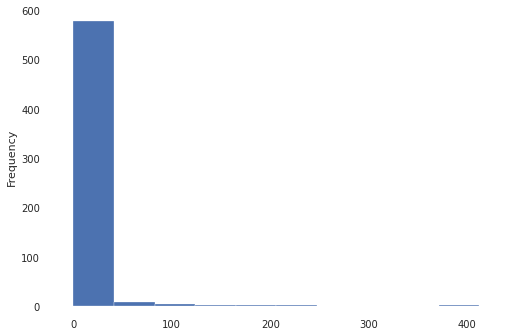

In [0]:
df.t_execucao.plot.hist()

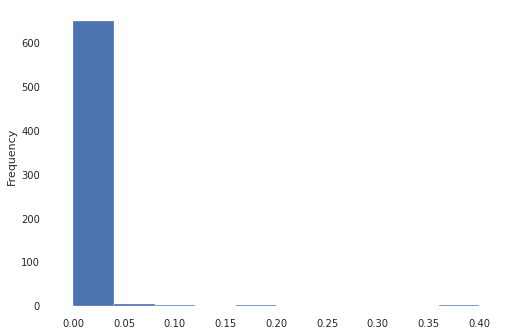

In [0]:
df.n_classes.plot.hist()

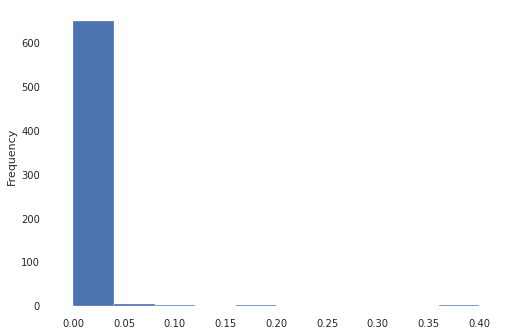

In [0]:
df.n_functions.plot.hist()

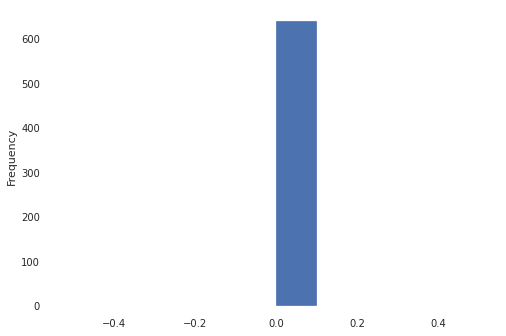

In [0]:
df.bitwise_op.plot.hist()

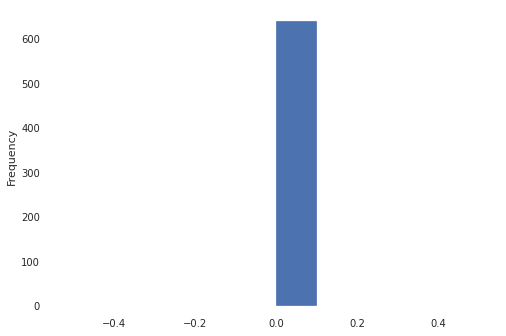

In [0]:
df.identity_op.plot.hist()

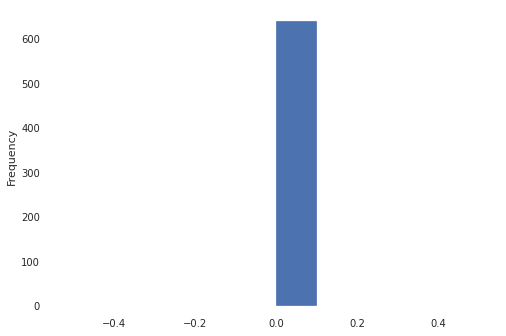

In [0]:
df.lambdas.plot.hist()

In [0]:
df = df.drop(columns=['n_classes', 't_execucao', 'n_functions', 'bitwise_op', 'bitwise_op_unique', 'identity_op', 'lambdas'], axis=0)
df.head()

exercicio  tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
0        196    41.130750   16.987433      5.909091  16.636364  15.000000   
1       1002    10.168481    9.842685      1.176471   8.176471   5.000000   
2       1018    11.984919   11.160011      2.466667  15.333333  11.666667   
3       1019    13.483014   13.483014      4.923077  13.538462   9.384615   
4       1020    12.350928   11.960365      6.136364  16.772727  14.727273   

   nota_final  complexity        loc       lloc       sloc  single_comments  \
0   54.545455    3.333333  12.333333  10.666667  10.666667         0.000000   
1   94.117647    1.000000   7.500000   5.875000   5.875000         0.187500   
2   86.666667    1.000000   9.307692   5.923077   5.923077         0.923077   
3  100.000000    1.000000  10.538462   5.769231   5.769231         1.384615   
4   81.818182    1.000000   8.500000   6.833333   6.833333         0.055556   

   comments  multilines  blank_lines        h1        h2        N1        N2  \
0  0.000000         0.0     1.666667  1.166667  4.666667  2.333333  4.666667   
1  0.187500         0.0     1.437500  2.000000  6.000000  3.000000  6.000000   
2  0.923077         0.0     2.461538  2.000000  6.000000  3.000000  6.000000   
3  1.384615         0.0     3.384615  1.000000  4.000000  2.076923  4.153846   
4  0.055556         0.0     1.611111  2.944444  8.000000  4.055556  8.111111   

           h          N  calculated_N     volume  difficulty     effort  \
0   5.833333   7.000000     12.169925  19.972812    0.583333  15.697438   
1   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
2   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
3   5.000000   6.230769      8.000000  14.467398    0.519231   7.635571   
4  10.944444  12.166667     28.601838  41.998082    1.493056  62.970887   

       bugs      time   imports  assignments  assignments_unique  keywords  \
0  0.006658  0.872080  2.000000     4.333333                 1.0  7.000000   
1  0.009000  1.500000  1.000000     3.875000                 1.0  1.937500   
2  0.009000  1.500000  0.076923     4.846154                 1.0  0.153846   
3  0.004822  0.424198  0.076923     4.692308                 1.0  0.153846   
4  0.013999  3.498383  0.111111     5.722222                 1.0  0.222222   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0         4.166667         1.333333         6.666667               0.0   
1         1.937500         2.000000         1.500000               0.0   
2         0.153846         2.000000         2.769231               0.0   
3         0.153846         1.000000         2.769231               0.0   
4         0.222222         2.000000         3.777778               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0    0.333333           0.166667       2.000000              1.000000   
1    0.000000           0.000000       3.937500              2.000000   
2    0.000000           0.000000       3.076923              2.000000   
3    0.000000           0.000000       2.153846              1.000000   
4    0.000000           0.000000       4.166667              2.944444   

   comparison_op  comparison_op_unique  membership_op  conditionals     loops  \
0            2.0                   1.0       0.333333           2.0  0.333333   
1            0.0                   0.0       0.000000           0.0  0.000000   
2            0.0                   0.0       0.000000           0.0  0.000000   
3            0.0                   0.0       0.000000           0.0  0.000000   
4            0.0                   0.0       0.000000           0.0  0.000000   

   loop_control  builtin_f  builtin_f_unique    type_f  type_f_unique  \
0           0.0   8.333333          4.166667  2.333333       1.166667   
1           0.0   6.000000          4.000000  2.000000       1.000000   
2           0.0   8.000000          4.000000  3.000000       1.000000   
3

### 5.1 Pandas Profiling Report

In [0]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 45.8MB 591kB/s
     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 614kB 10.8MB/s 
     |████████████████████████████████| 3.1MB 26.5MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 296kB 44.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=bd83116660e327ebcef355f819f4cb2b1dd2a73cae27f9b23e384deda5220952
  Stored in directory: /tmp/pip-ephem-wheel-cache-xb_bfn1c/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=67759fbbc893f5d5b969f023987d0e5df3c50922fe7c7013ed7ec4a1248e8cc3
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=6673e0464d5f99cd10e58e4789c005249a5b892a5501a26dbfcb

In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(df, title='Relatório - Pandas Profiling', html={'style':{'full_width':False}})

In [0]:
profile.to_file('../reports/exercicios.html')

### 5.1 Distribuição das Features

Visualizando a distribuição das features:

In [0]:
features = df.columns[1:-2]
features

Index(['tempo_total', 'tempo_foco', 'n_submissoes', 'n_testes', 'n_erros',
       'nota_final', 'complexity', 'loc', 'lloc', 'sloc', 'single_comments',
       'comments', 'multilines', 'blank_lines', 'h1', 'h2', 'N1', 'N2', 'h',
       'N', 'calculated_N', 'volume', 'difficulty', 'effort', 'bugs', 'time',
       'imports', 'assignments', 'assignments_unique', 'keywords',
       'keywords_unique', 'literal_numbers', 'literal_strings',
       'literal_booleans', 'logical_op', 'logical_op_unique', 'arithmetic_op',
       'arithmetic_op_unique', 'comparison_op', 'comparison_op_unique',
       'membership_op', 'conditionals', 'loops', 'loop_control', 'builtin_f',
       'builtin_f_unique', 'type_f', 'type_f_unique', 'lpar', 'rpar', 'prints',
       'inputs'],
      dtype='object')

In [0]:
from matplotlib import pyplot

def plot_hist_boxplot(feature:str, df, title='Distribution'):
    f, (ax_box, ax_hist) = pyplot.subplots(2, figsize=(15,8), sharex=True, gridspec_kw={"height_ratios": (.20, 1.50)})
    sns.boxplot(df[feature], ax=ax_box, palette='Blues_d')
    sns.distplot(df[feature], ax=ax_hist, bins=50)
    ax_box.set(title=title.upper())
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=feature.upper())
    ax_hist.set(ylabel='Frequency')

    plt.show()
    print(df[feature].quantile([.025, .25, .5, .75, .975]))

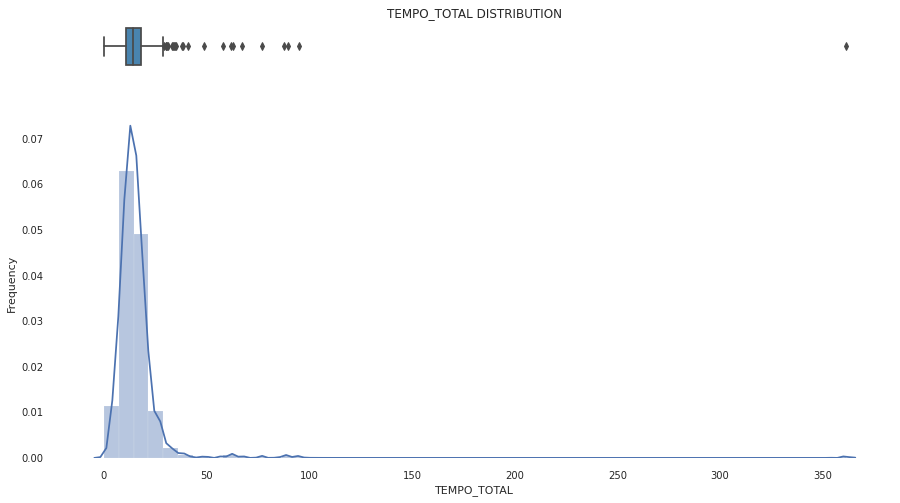

0.025     4.688159
0.250    10.680516
0.500    14.021899
0.750    17.892626
0.975    33.634969
Name: tempo_total, dtype: float64


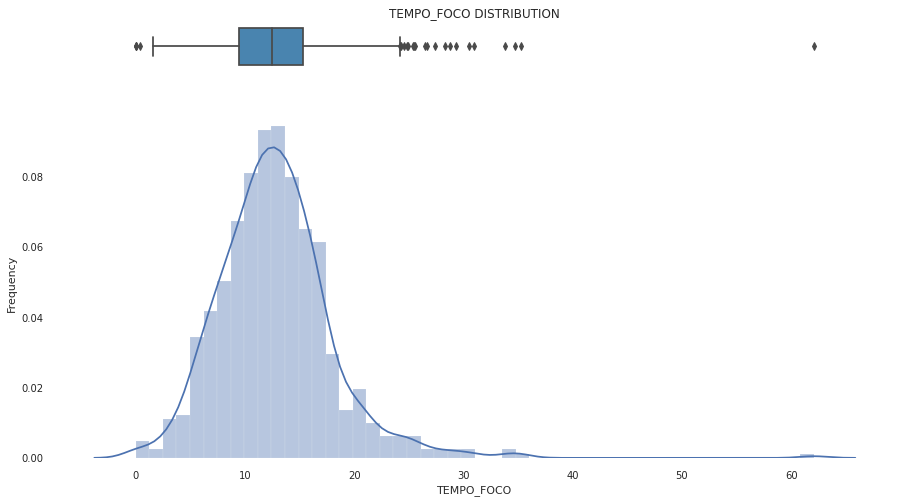

0.025     4.145152
0.250     9.461141
0.500    12.485690
0.750    15.350959
0.975    24.737107
Name: tempo_foco, dtype: float64


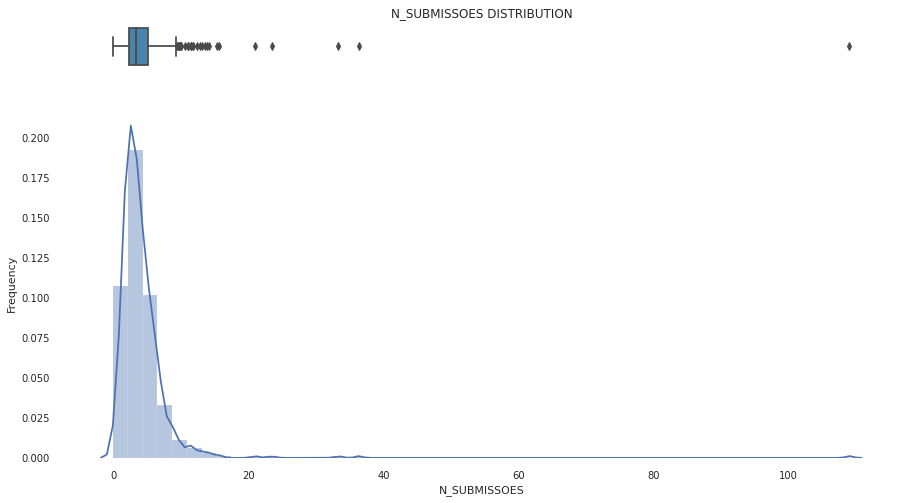

0.025     0.777778
0.250     2.283967
0.500     3.398413
0.750     5.127083
0.975    11.524038
Name: n_submissoes, dtype: float64


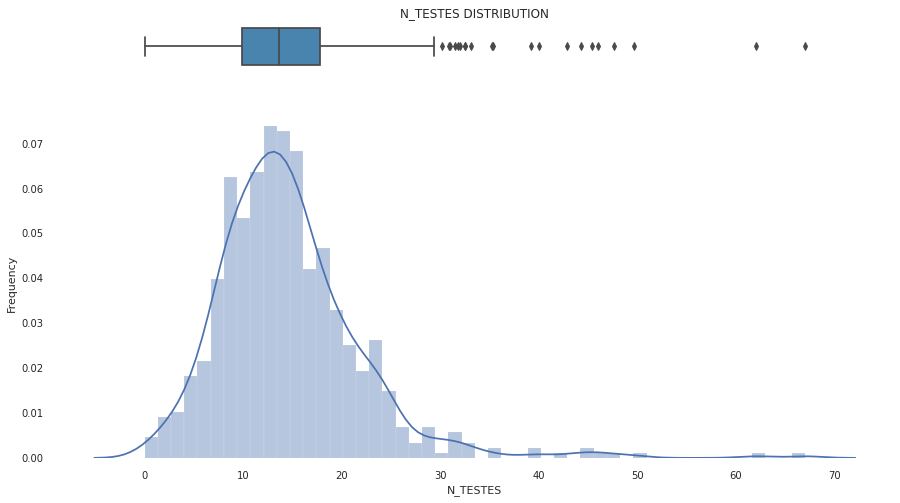

0.025     3.465278
0.250     9.852273
0.500    13.613095
0.750    17.779871
0.975    31.687500
Name: n_testes, dtype: float64


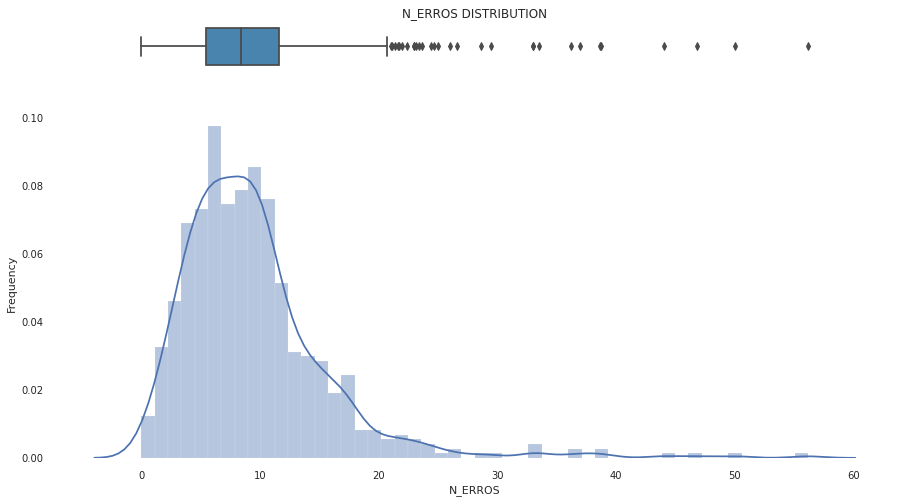

0.025     1.562500
0.250     5.475564
0.500     8.441558
0.750    11.614583
0.975    24.528804
Name: n_erros, dtype: float64


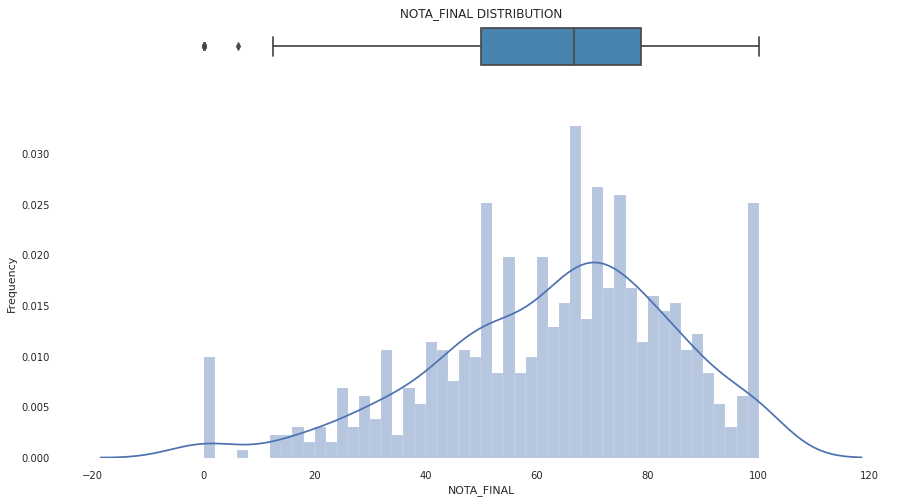

0.025     13.690476
0.250     50.000000
0.500     66.666667
0.750     78.789541
0.975    100.000000
Name: nota_final, dtype: float64


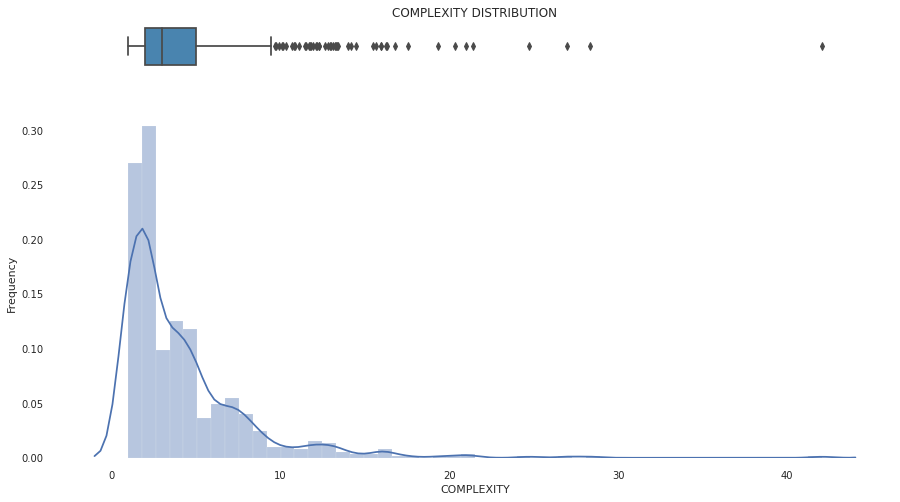

0.025     1.000000
0.250     2.000000
0.500     3.000000
0.750     5.056373
0.975    14.525000
Name: complexity, dtype: float64


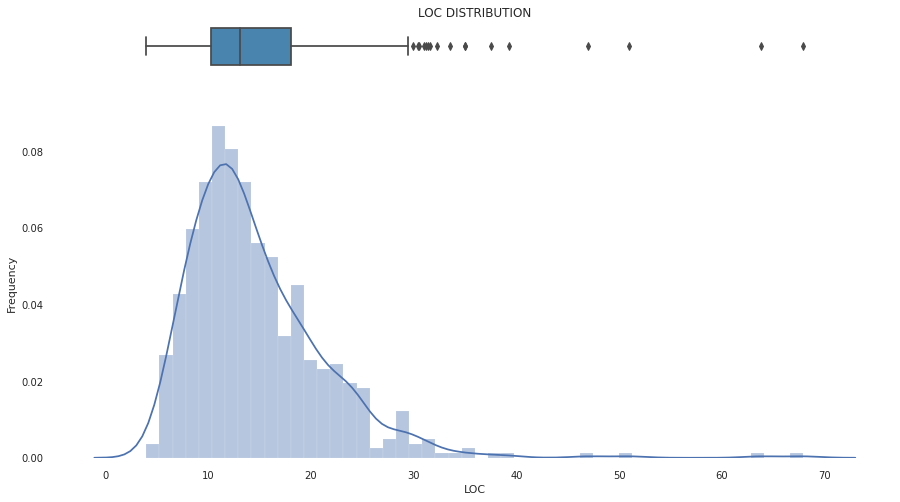

0.025     6.330435
0.250    10.250000
0.500    13.064224
0.750    18.069231
0.975    29.963571
Name: loc, dtype: float64


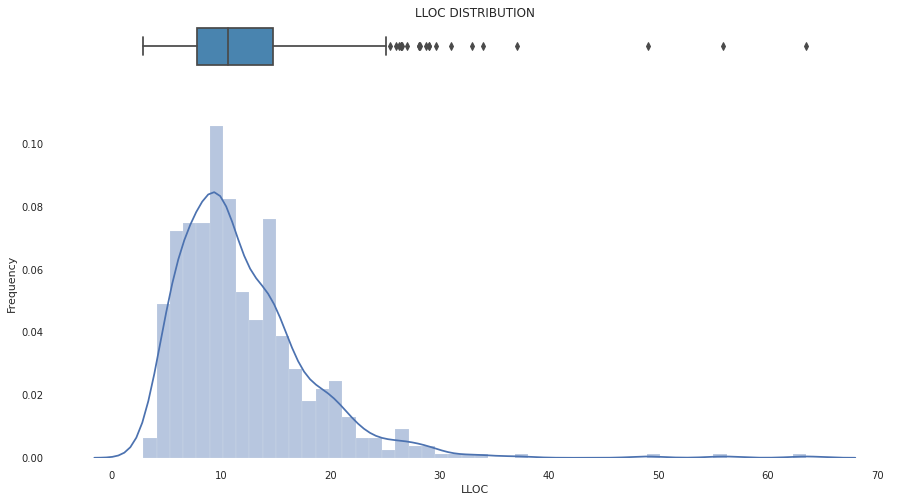

0.025     4.772339
0.250     7.873641
0.500    10.661458
0.750    14.801923
0.975    26.501786
Name: lloc, dtype: float64


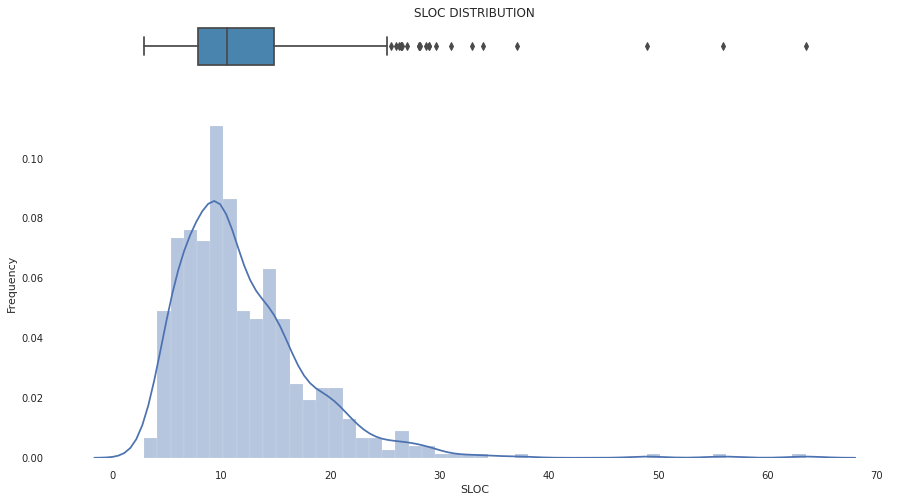

0.025     4.740887
0.250     7.833333
0.500    10.554167
0.750    14.870588
0.975    26.501786
Name: sloc, dtype: float64


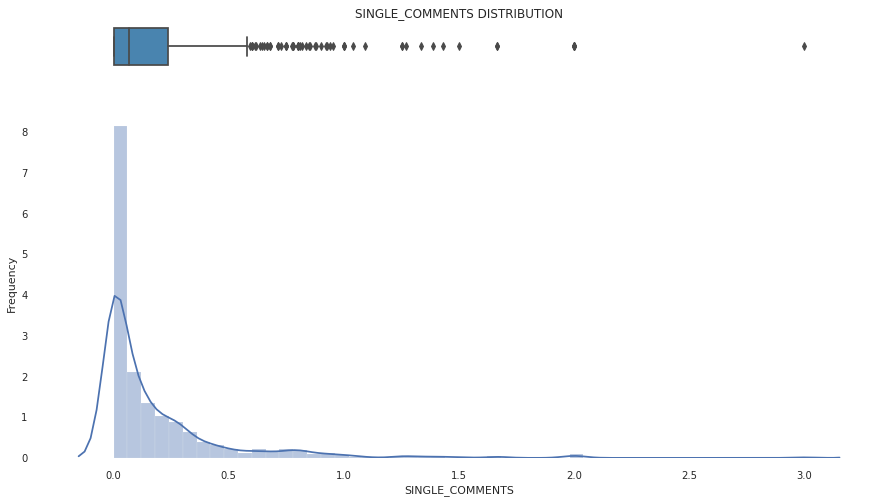

0.025    0.000000
0.250    0.000000
0.500    0.066667
0.750    0.235294
0.975    1.001000
Name: single_comments, dtype: float64


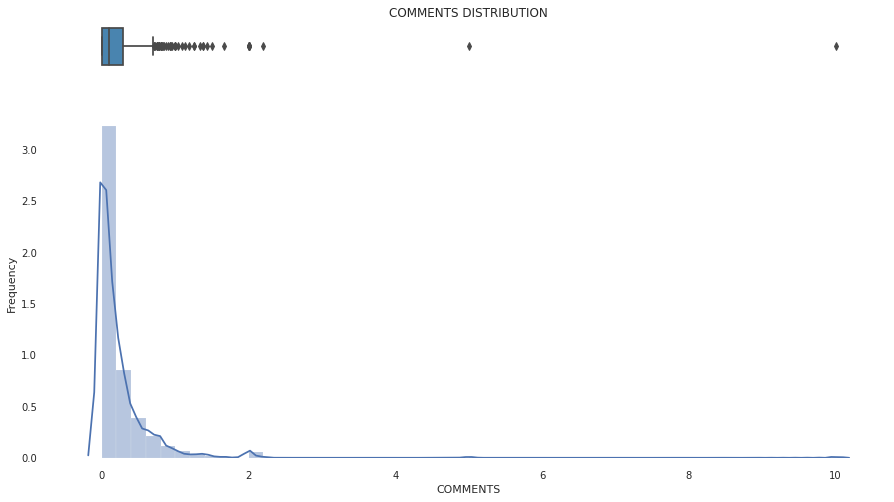

0.025    0.000000
0.250    0.000000
0.500    0.101724
0.750    0.285714
0.975    1.252083
Name: comments, dtype: float64


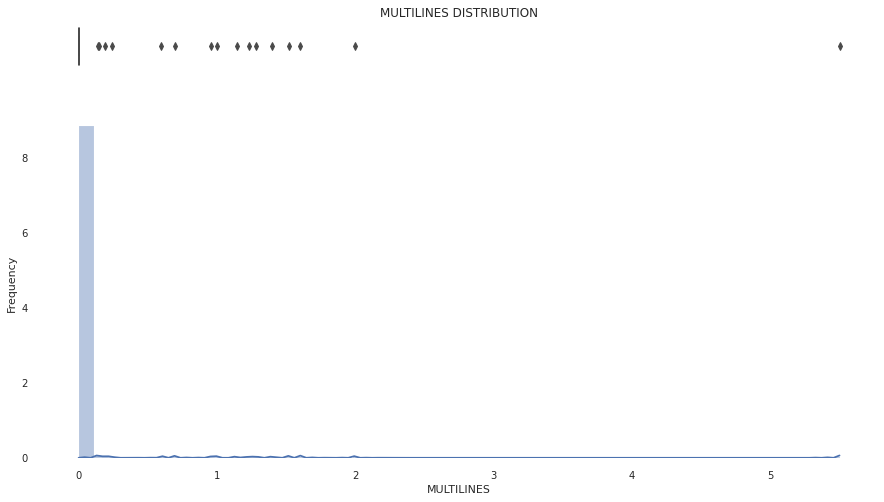

0.025    0.000000
0.250    0.000000
0.500    0.000000
0.750    0.000000
0.975    0.003571
Name: multilines, dtype: float64


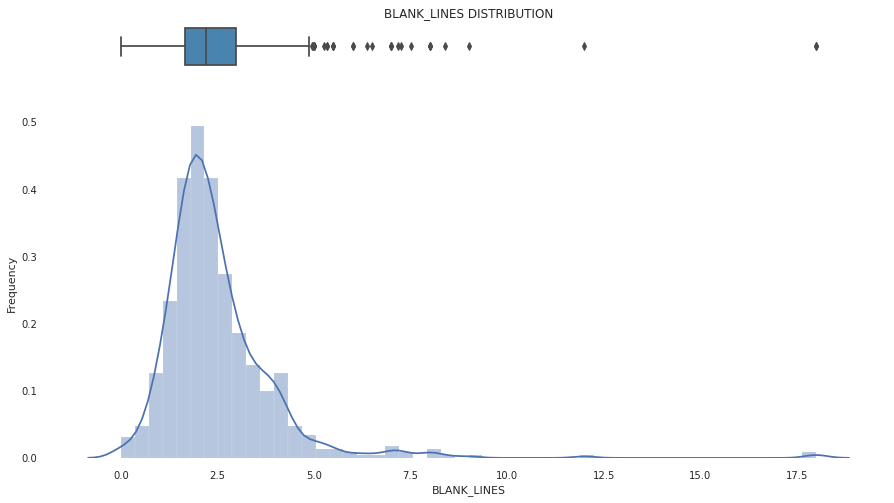

0.025    0.666667
0.250    1.664773
0.500    2.193064
0.750    2.981250
0.975    6.009375
Name: blank_lines, dtype: float64


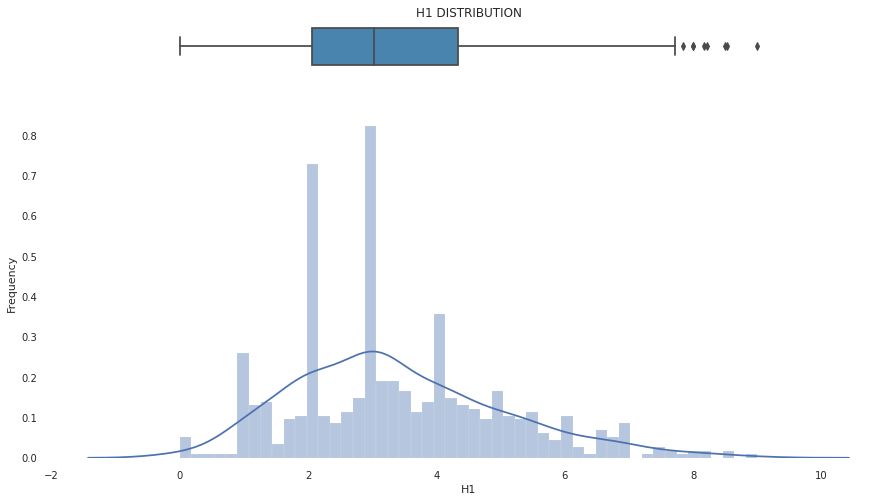

0.025    1.000000
0.250    2.058007
0.500    3.028992
0.750    4.333333
0.975    7.000000
Name: h1, dtype: float64


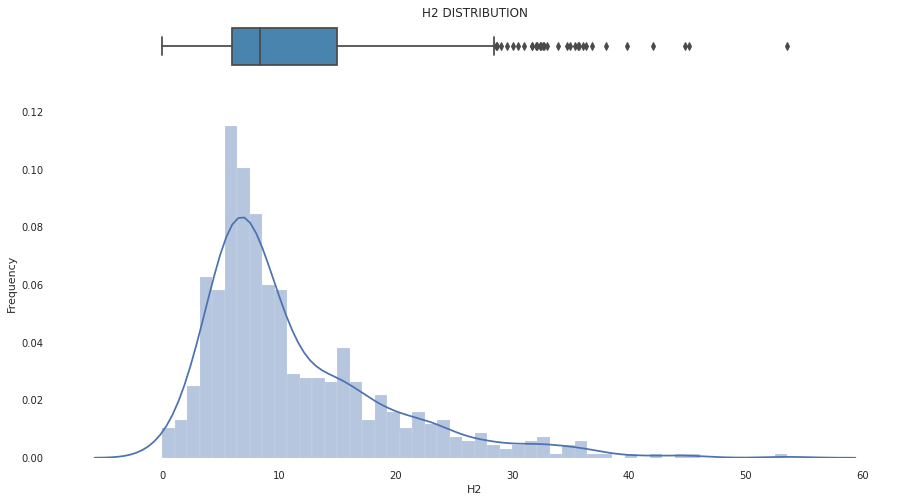

0.025     2.216667
0.250     6.000000
0.500     8.371711
0.750    15.000000
0.975    32.673276
Name: h2, dtype: float64


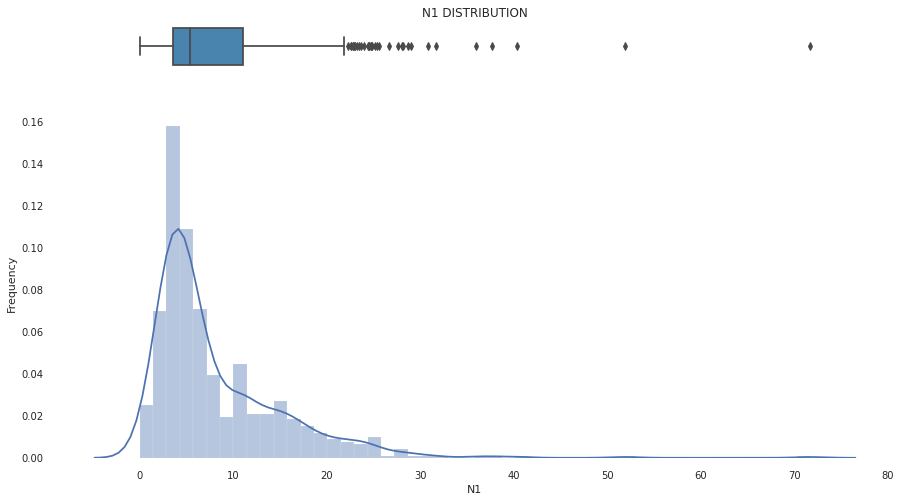

0.025     1.295139
0.250     3.567460
0.500     5.390152
0.750    11.015625
0.975    24.820218
Name: N1, dtype: float64


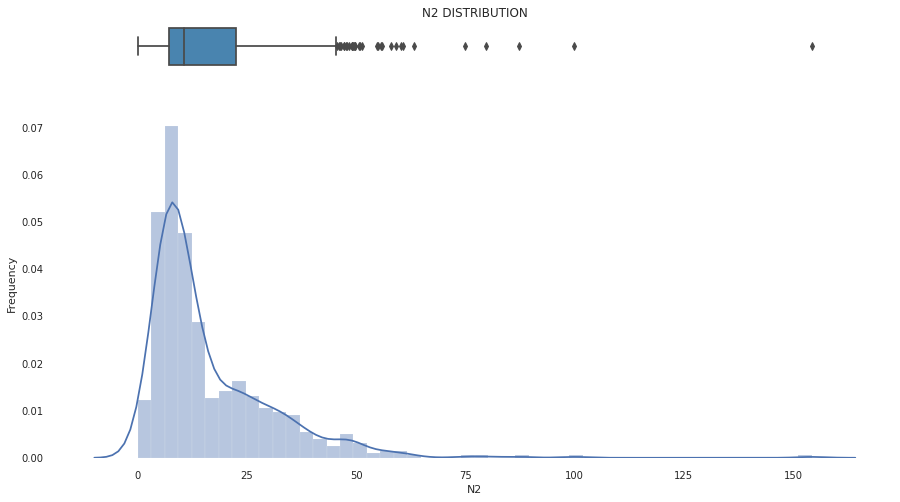

0.025     2.590278
0.250     7.096257
0.500    10.615385
0.750    22.440789
0.975    50.614948
Name: N2, dtype: float64


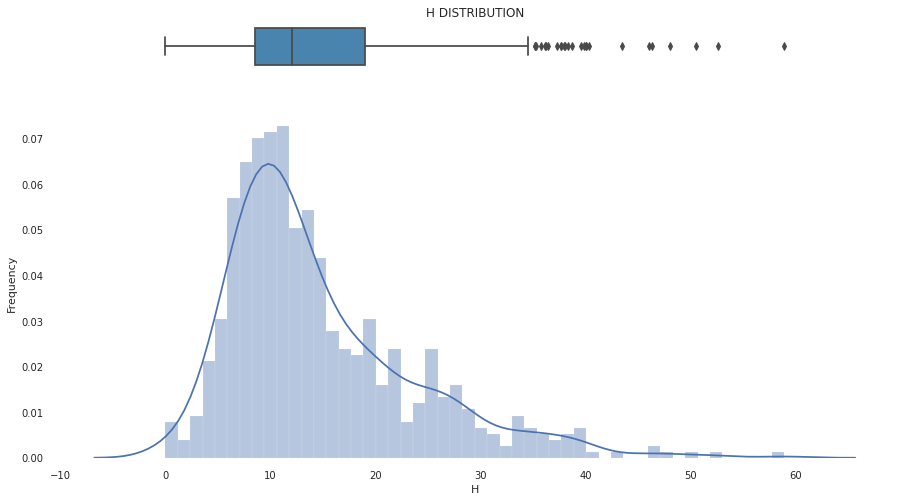

0.025     3.569697
0.250     8.538722
0.500    12.000000
0.750    19.000000
0.975    37.918750
Name: h, dtype: float64


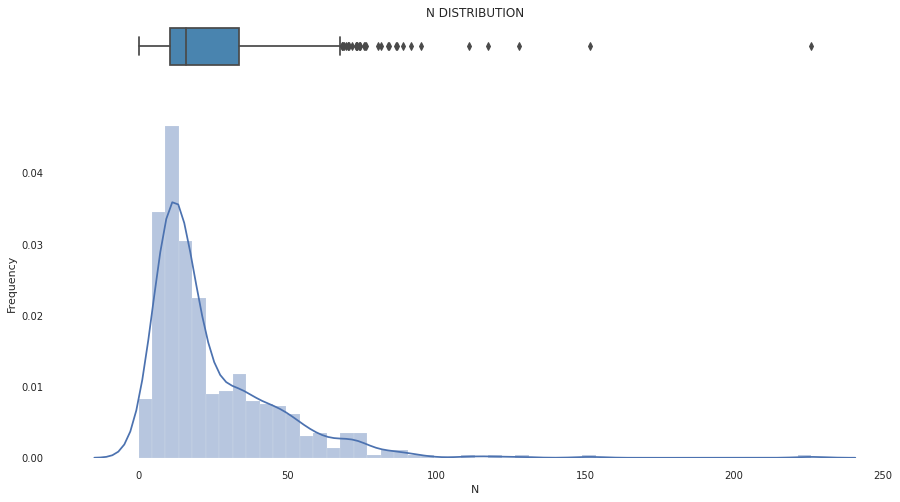

0.025     3.885417
0.250    10.702381
0.500    15.961538
0.750    33.632519
0.975    75.734091
Name: N, dtype: float64


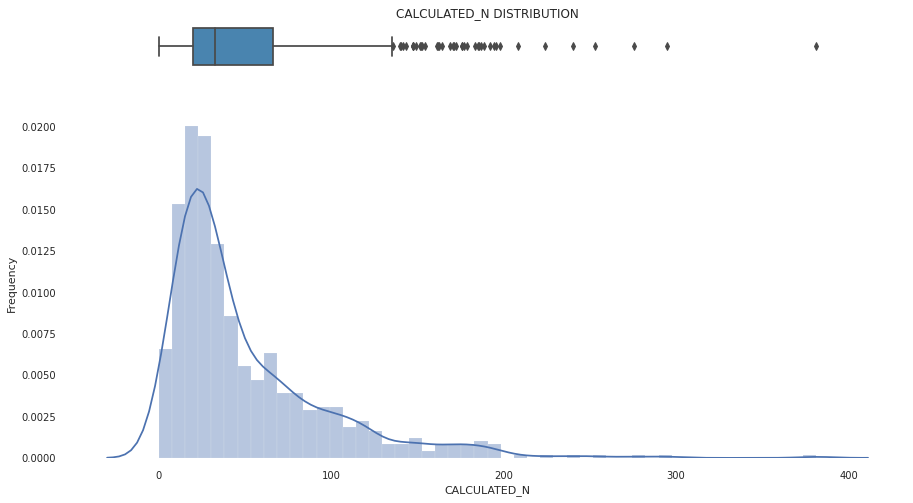

0.025      3.726789
0.250     19.944166
0.500     32.734453
0.750     66.201331
0.975    178.611577
Name: calculated_N, dtype: float64


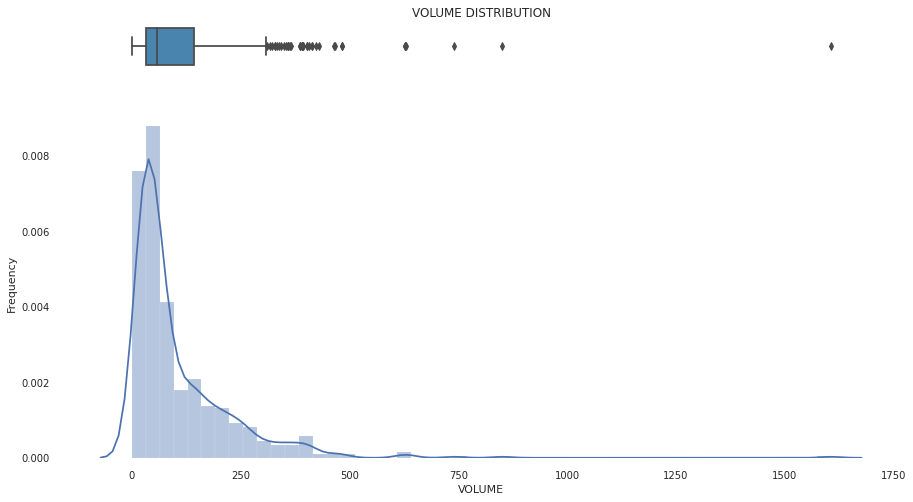

0.025      7.665054
0.250     33.366853
0.500     58.547385
0.750    143.369698
0.975    403.818541
Name: volume, dtype: float64


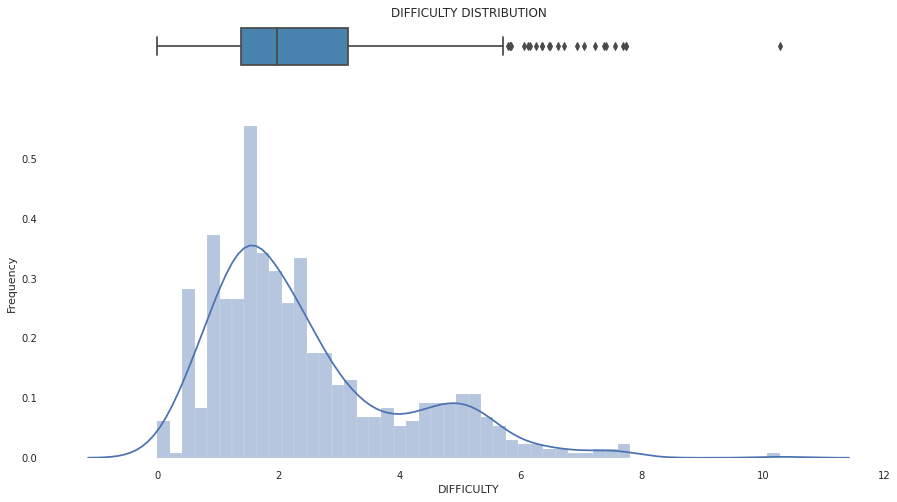

0.025    0.500000
0.250    1.374716
0.500    1.974003
0.750    3.140509
0.975    6.247287
Name: difficulty, dtype: float64


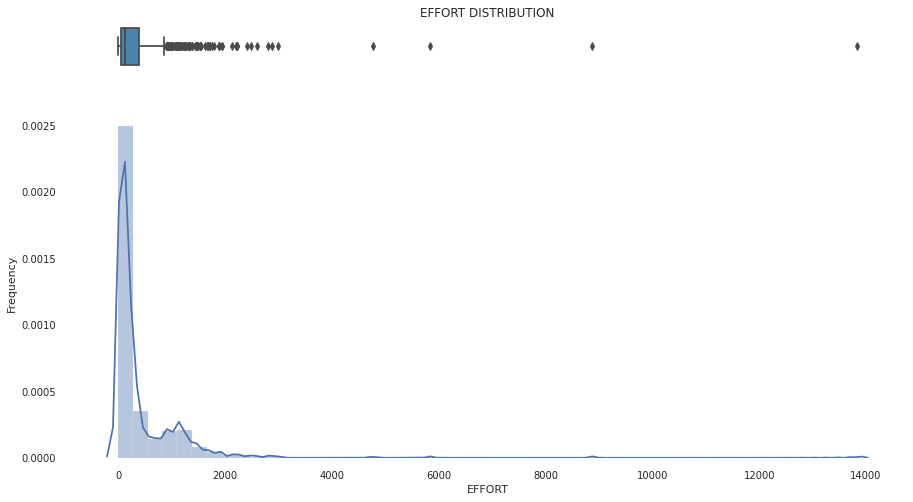

0.025       6.732902
0.250      58.585757
0.500     127.515073
0.750     381.817804
0.975    1898.158720
Name: effort, dtype: float64


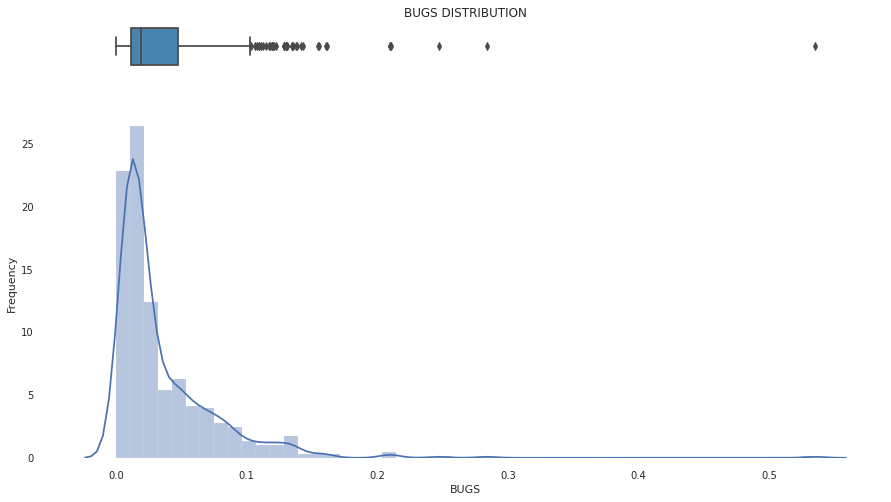

0.025    0.002555
0.250    0.011122
0.500    0.019516
0.750    0.047790
0.975    0.134606
Name: bugs, dtype: float64


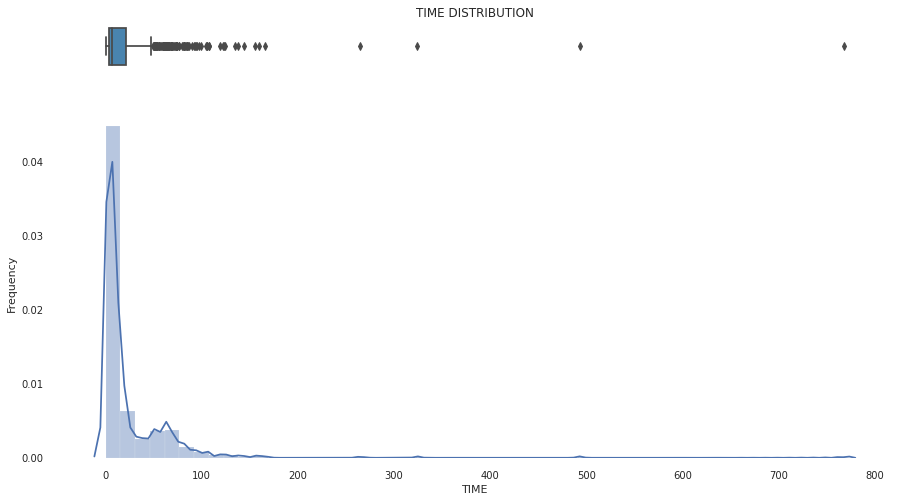

0.025      0.374050
0.250      3.254764
0.500      7.084171
0.750     21.212100
0.975    105.453262
Name: time, dtype: float64


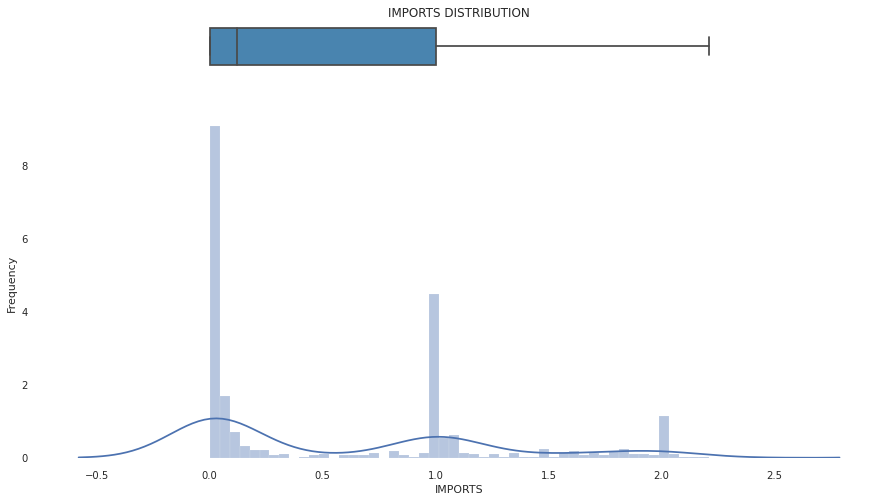

0.025    0.000000
0.250    0.000000
0.500    0.121324
0.750    1.000000
0.975    2.000000
Name: imports, dtype: float64


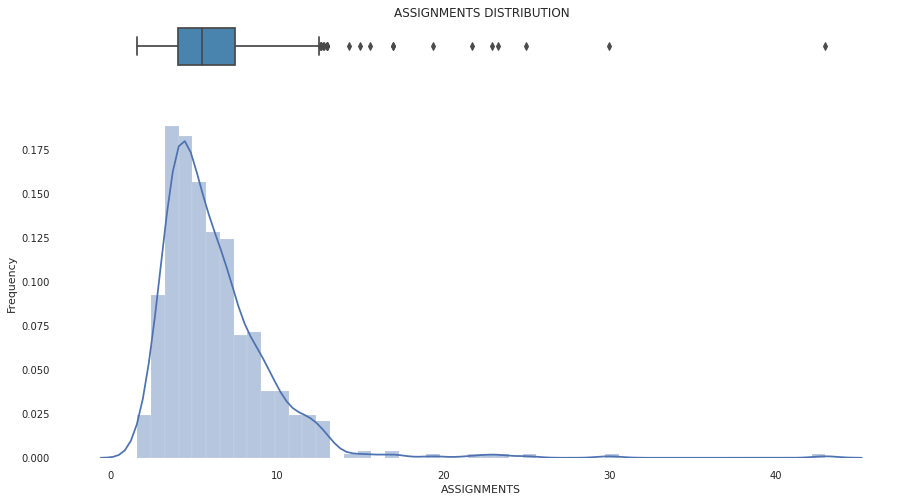

0.025     2.537500
0.250     4.064870
0.500     5.500000
0.750     7.462225
0.975    13.000000
Name: assignments, dtype: float64


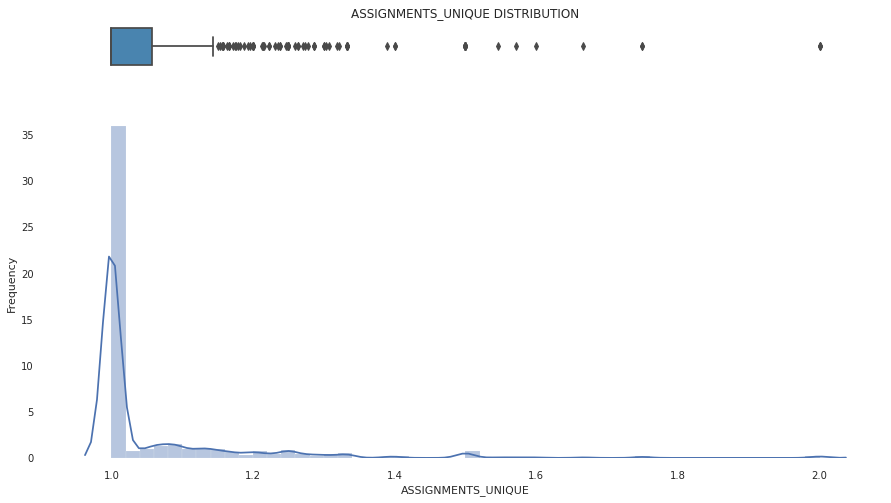

0.025    1.000000
0.250    1.000000
0.500    1.000000
0.750    1.057563
0.975    1.500000
Name: assignments_unique, dtype: float64


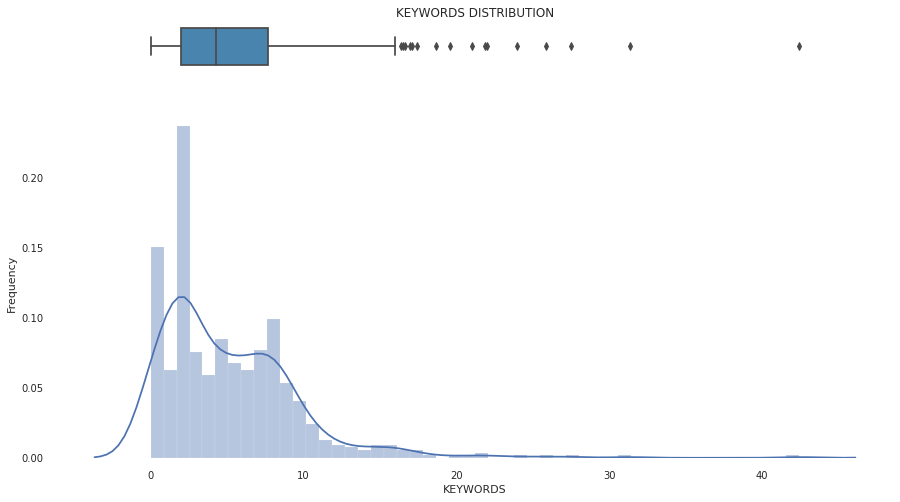

0.025     0.000000
0.250     2.000000
0.500     4.289583
0.750     7.674242
0.975    16.009375
Name: keywords, dtype: float64


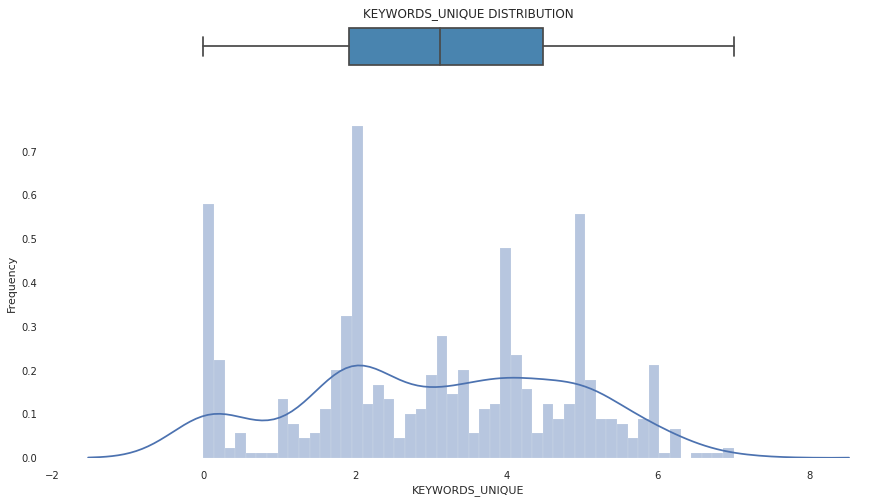

0.025    0.000000
0.250    1.923077
0.500    3.125000
0.750    4.487500
0.975    6.000000
Name: keywords_unique, dtype: float64


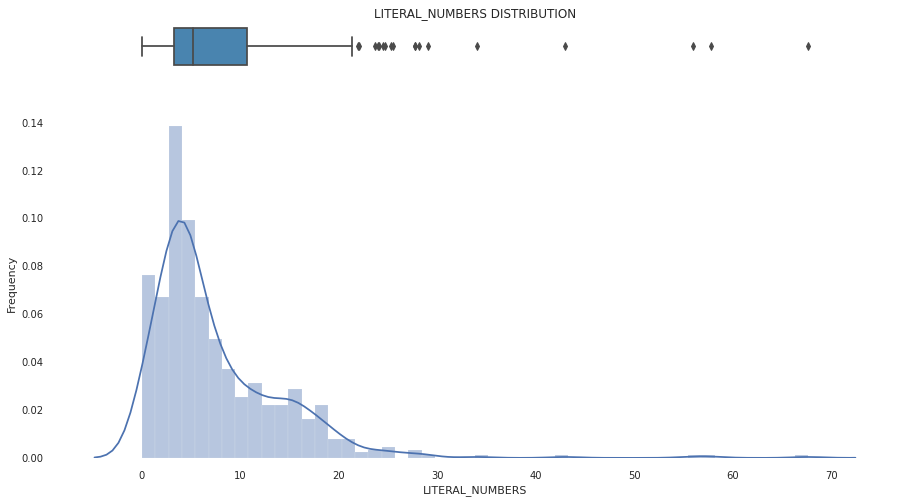

0.025     0.000000
0.250     3.229167
0.500     5.211207
0.750    10.673077
0.975    22.040741
Name: literal_numbers, dtype: float64


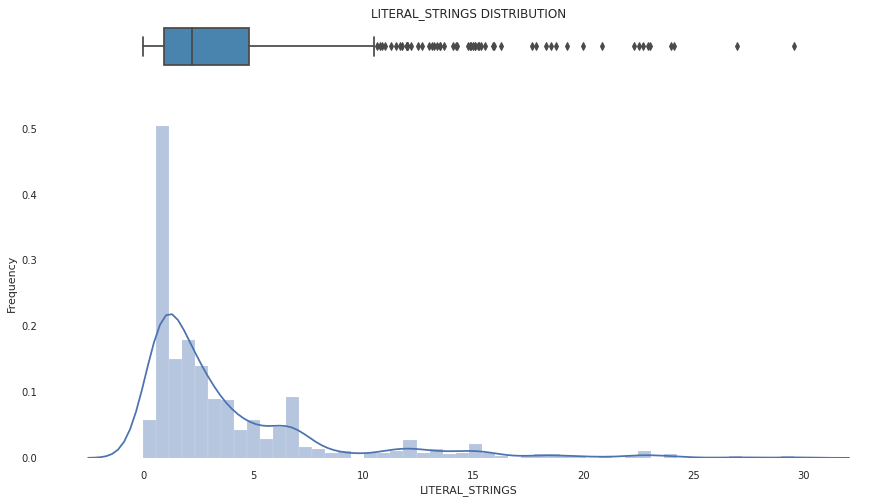

0.025     0.500000
0.250     0.941667
0.500     2.210591
0.750     4.810526
0.975    17.671429
Name: literal_strings, dtype: float64


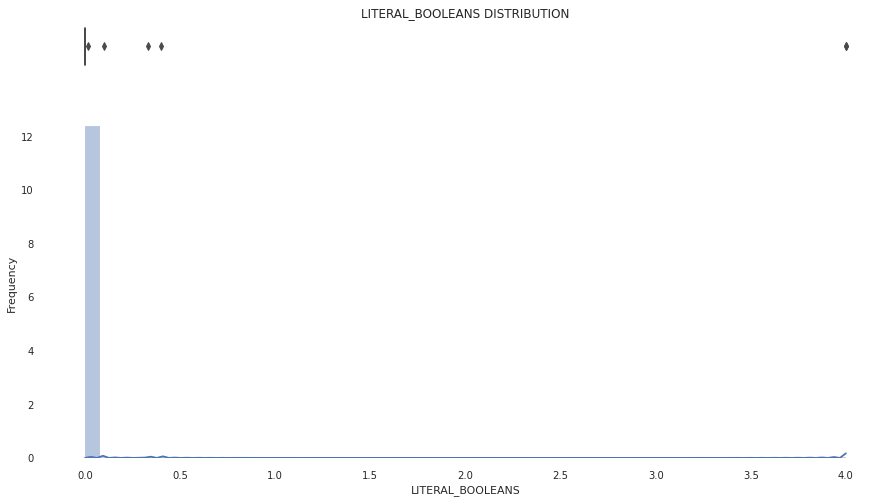

0.025    0.0
0.250    0.0
0.500    0.0
0.750    0.0
0.975    0.0
Name: literal_booleans, dtype: float64


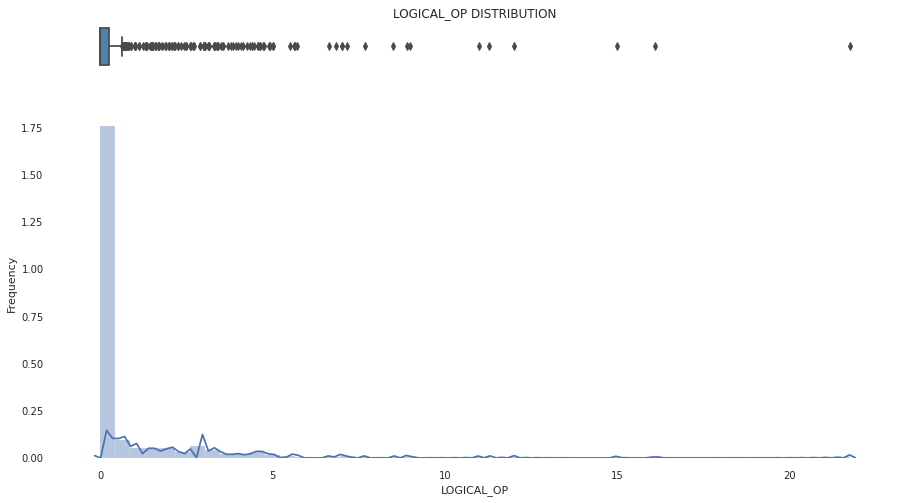

0.025    0.000000
0.250    0.000000
0.500    0.000000
0.750    0.255682
0.975    5.644286
Name: logical_op, dtype: float64


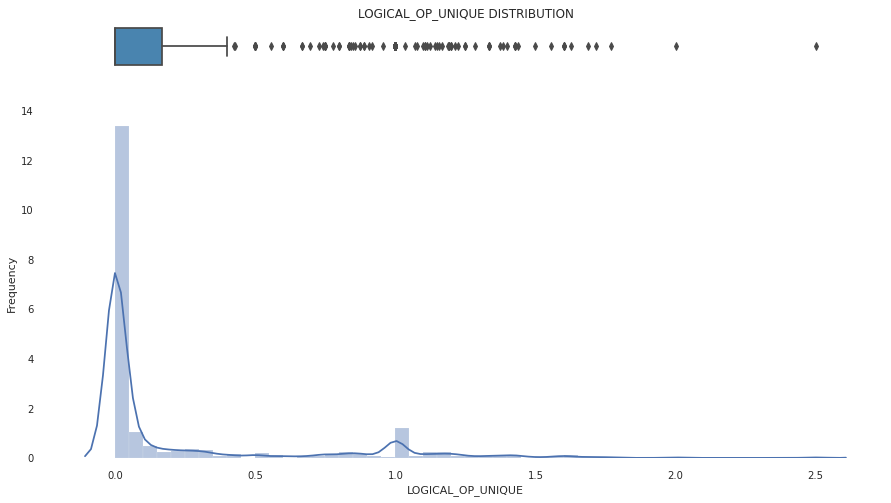

0.025    0.000000
0.250    0.000000
0.500    0.000000
0.750    0.166667
0.975    1.385000
Name: logical_op_unique, dtype: float64


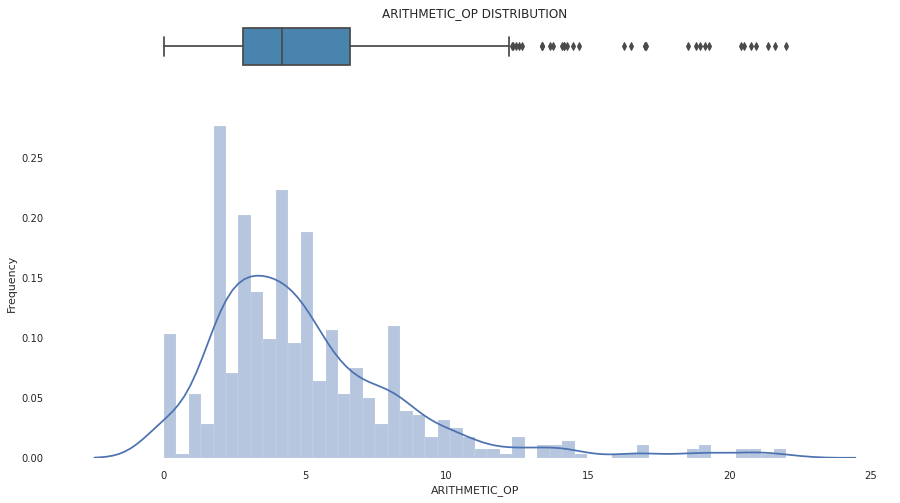

0.025     0.000000
0.250     2.783730
0.500     4.169540
0.750     6.571429
0.975    16.272500
Name: arithmetic_op, dtype: float64


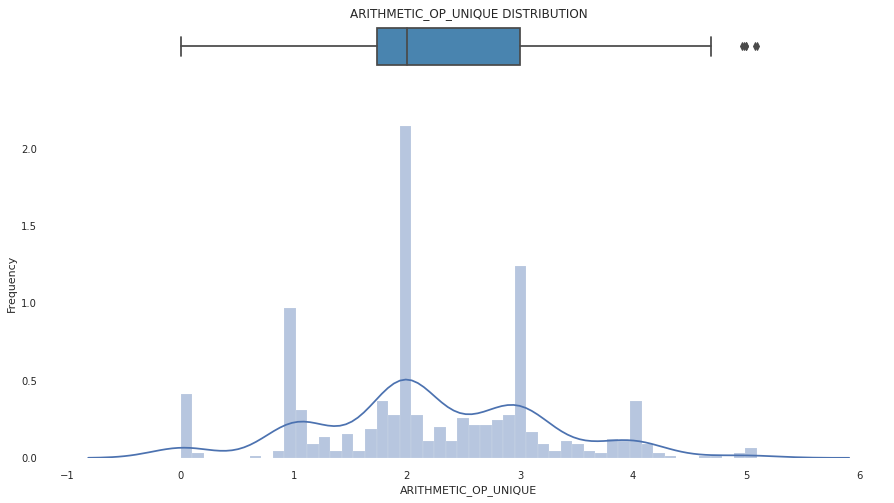

0.025    0.000000
0.250    1.737306
0.500    2.000000
0.750    3.000000
0.975    4.095357
Name: arithmetic_op_unique, dtype: float64


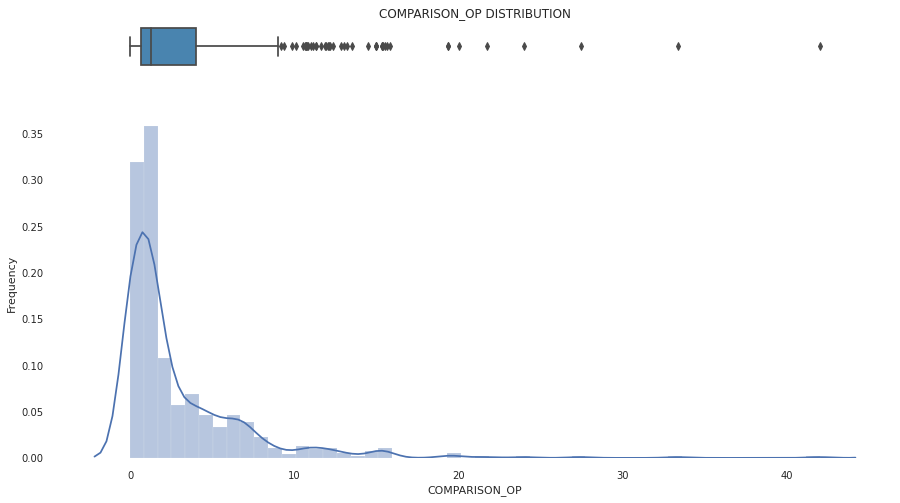

0.025     0.000000
0.250     0.656250
0.500     1.290625
0.750     4.000000
0.975    15.000000
Name: comparison_op, dtype: float64


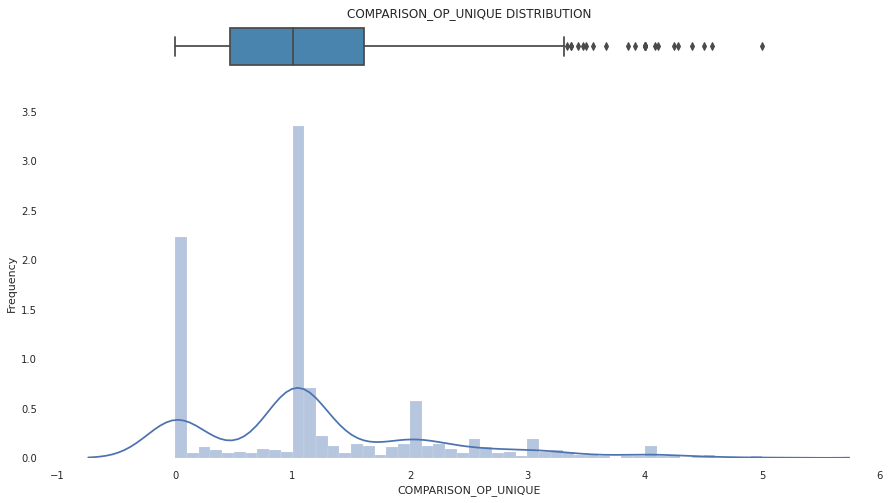

0.025    0.000000
0.250    0.465199
0.500    1.000000
0.750    1.607609
0.975    3.858631
Name: comparison_op_unique, dtype: float64


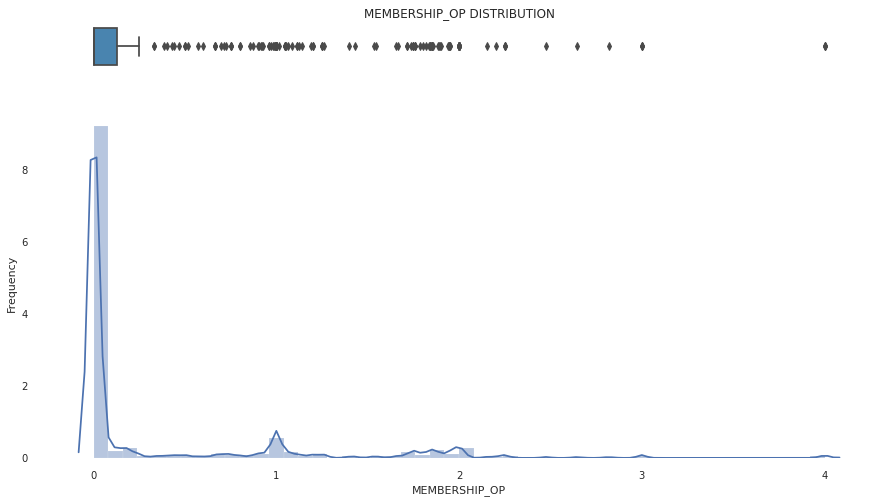

0.025    0.000000
0.250    0.000000
0.500    0.000000
0.750    0.126359
0.975    2.000000
Name: membership_op, dtype: float64


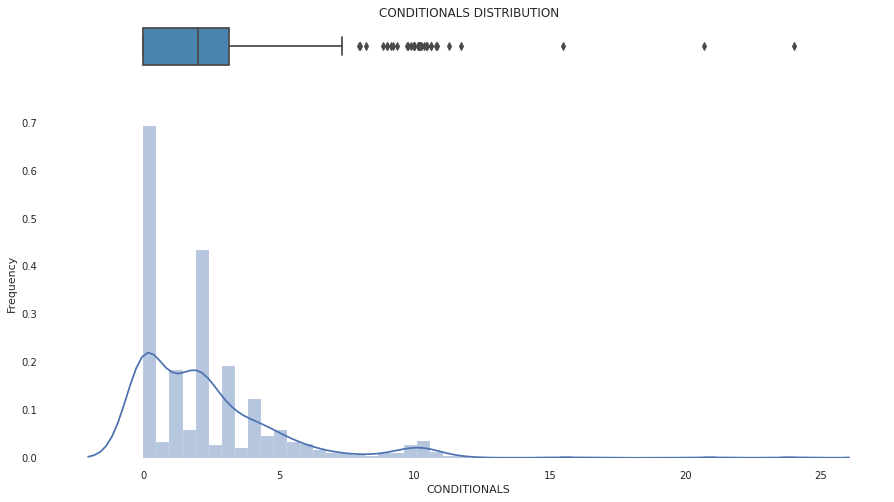

0.025     0.000000
0.250     0.000000
0.500     2.000000
0.750     3.160088
0.975    10.167130
Name: conditionals, dtype: float64


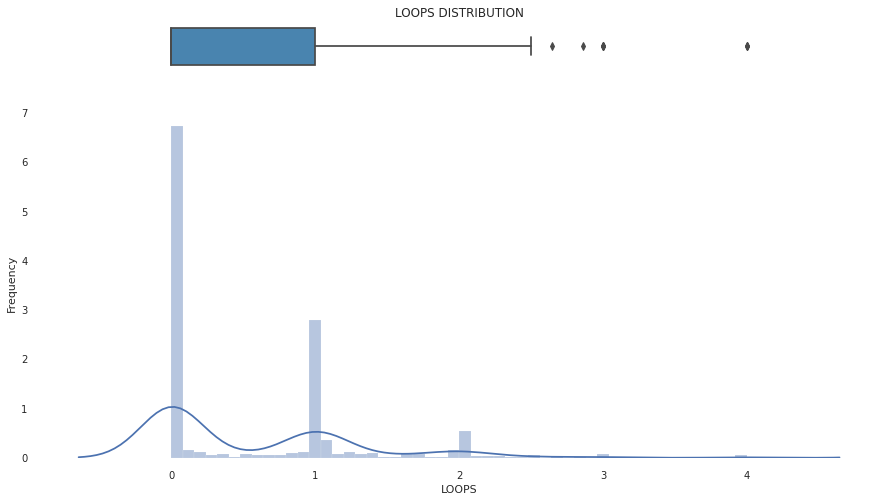

0.025    0.00000
0.250    0.00000
0.500    0.00000
0.750    1.00000
0.975    2.20125
Name: loops, dtype: float64


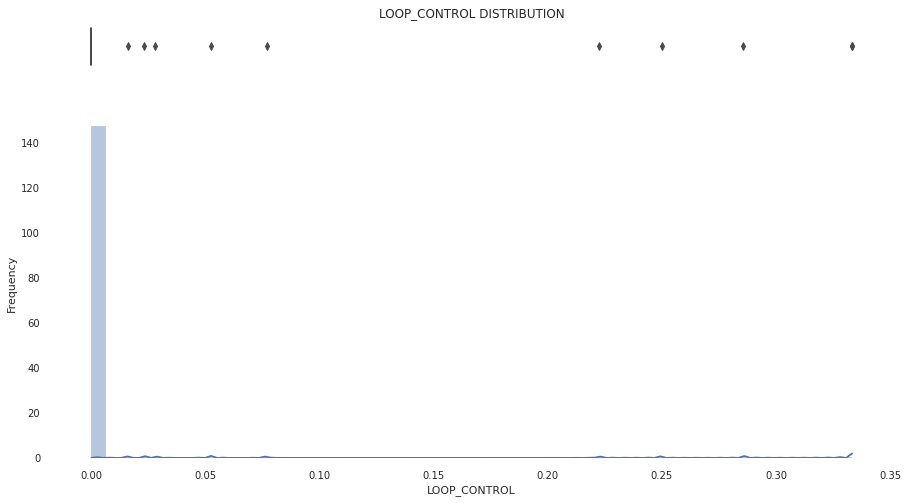

0.025    0.0
0.250    0.0
0.500    0.0
0.750    0.0
0.975    0.0
Name: loop_control, dtype: float64


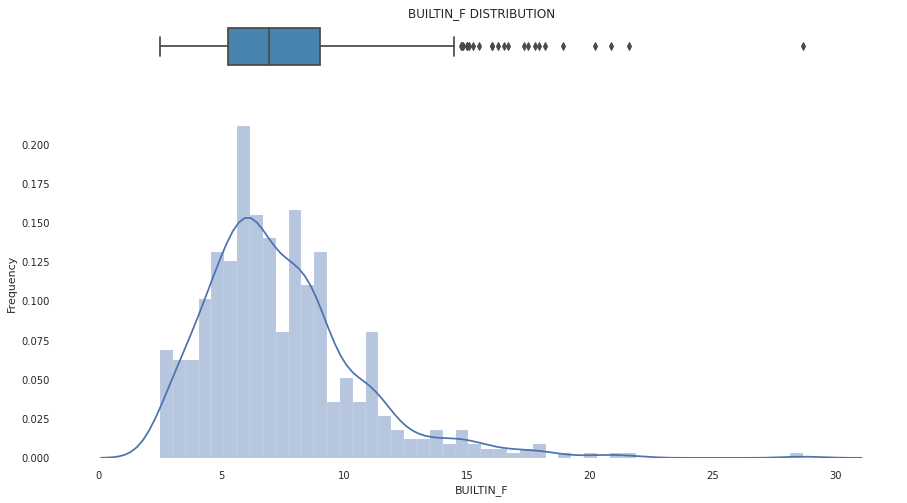

0.025     3.000000
0.250     5.279444
0.500     6.942547
0.750     9.000000
0.975    15.256250
Name: builtin_f, dtype: float64


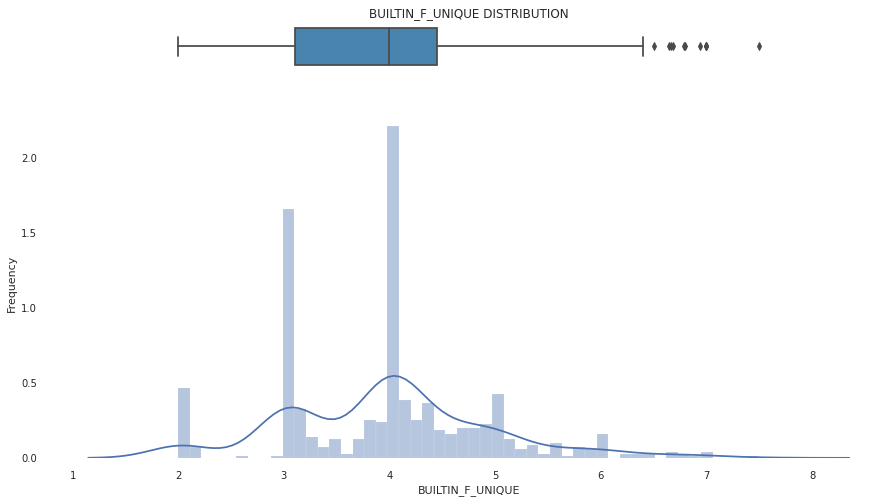

0.025    2.000000
0.250    3.103448
0.500    4.000000
0.750    4.450000
0.975    6.006250
Name: builtin_f_unique, dtype: float64


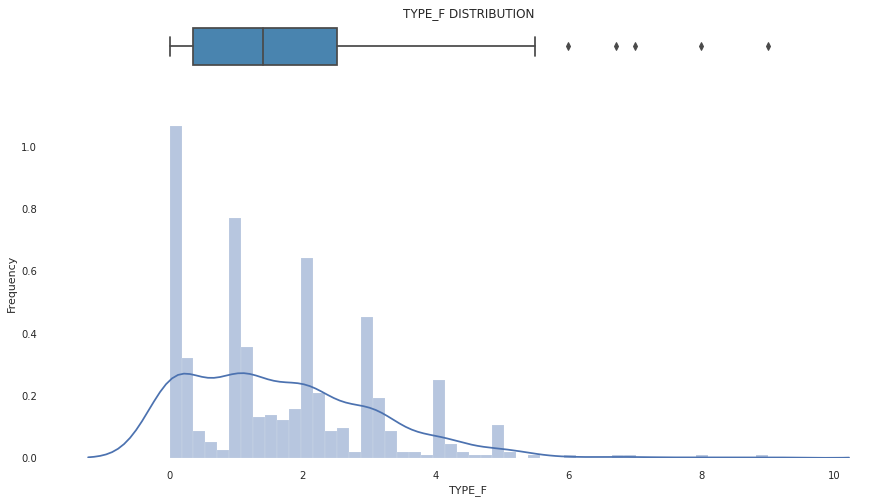

0.025    0.000000
0.250    0.359684
0.500    1.408333
0.750    2.514146
0.975    5.000000
Name: type_f, dtype: float64


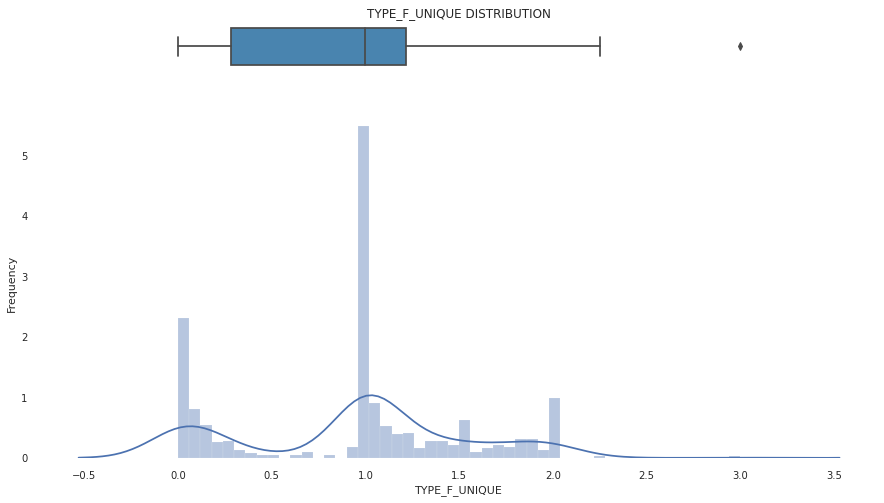

0.025    0.000000
0.250    0.285714
0.500    1.000000
0.750    1.216270
0.975    2.000000
Name: type_f_unique, dtype: float64


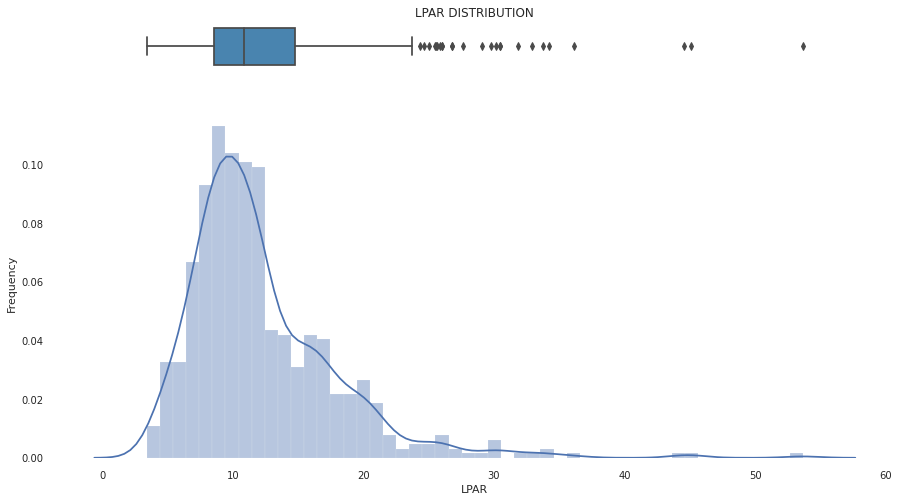

0.025     4.940015
0.250     8.544960
0.500    10.870833
0.750    14.744048
0.975    26.018750
Name: lpar, dtype: float64


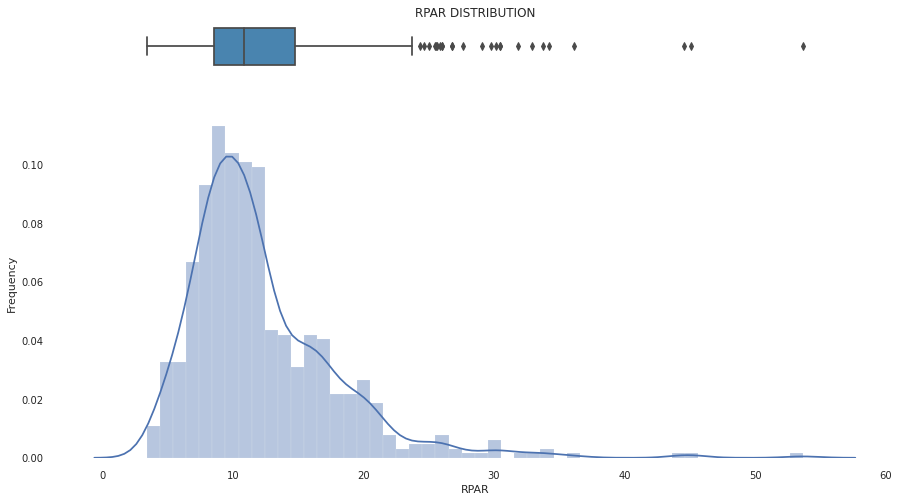

0.025     4.940015
0.250     8.544960
0.500    10.870833
0.750    14.744048
0.975    26.018750
Name: rpar, dtype: float64


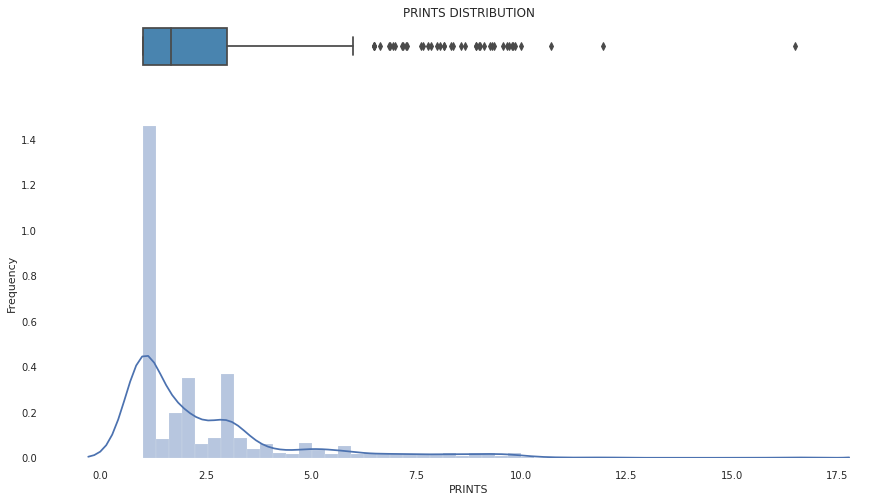

0.025    1.000000
0.250    1.000000
0.500    1.677083
0.750    3.000000
0.975    8.930357
Name: prints, dtype: float64


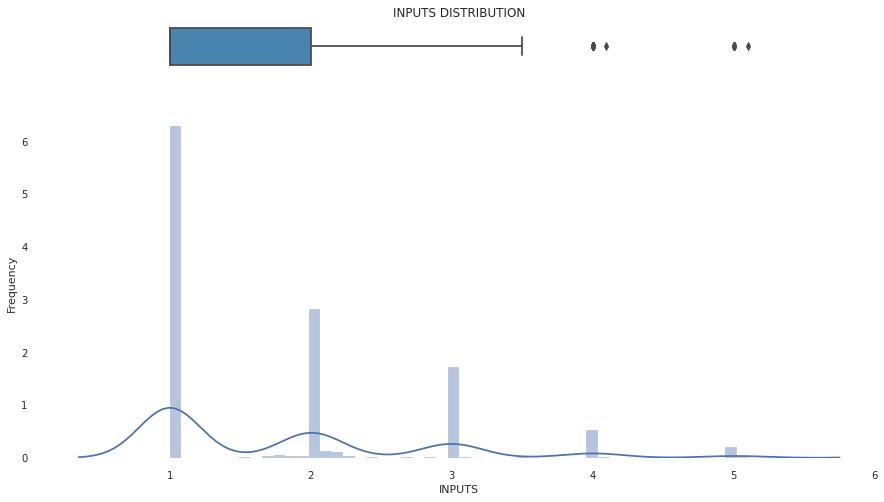

0.025    1.0
0.250    1.0
0.500    1.0
0.750    2.0
0.975    4.0
Name: inputs, dtype: float64


In [0]:
for feature in features:
    plot_hist_boxplot(feature, df, '{} Distribution'.format(feature))

### 5.2 Exercícios por Classe

In [0]:
def count_plot(feature: str, dataframe, titulo='Contagem'):
    size = dataframe[feature].unique().size
    # visualize
    plt.figure(1, figsize=(21, 0.6 * size))
    sns.countplot(y=feature, data=dataframe, palette='Blues_d')
    plt.title(titulo)
    plt.show()
    print("{}:\n{}".format(feature, dataframe[feature].value_counts()))

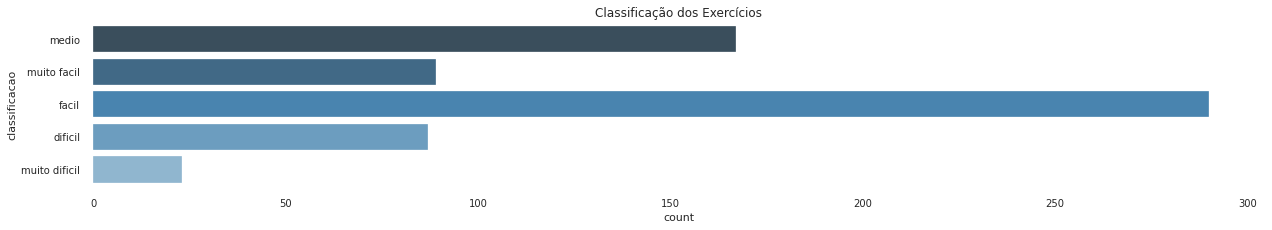

classificacao:
facil            290
medio            167
muito facil       89
dificil           87
muito dificil     23
Name: classificacao, dtype: int64


In [0]:
count_plot('classificacao', df, 'Classificação dos Exercícios')

- Aplicar log nas features com valores muito altos
- Fatores de Interação
- Verificar os gráficos de dispersão
- Histograma dos resíduos

### 5.3 Relação das Features com Taxa de Acerto

In [0]:
import plotly.express as px

In [0]:
for f in features:
    fig = px.scatter(df, x=df[f], y=df[target_column])
    fig.show()

### 5.4 Matriz de Correlação

In [0]:
df.head()

exercicio  tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
0        196    41.130750   16.987433      5.909091  16.636364  15.000000   
1       1002    10.168481    9.842685      1.176471   8.176471   5.000000   
2       1018    11.984919   11.160011      2.466667  15.333333  11.666667   
3       1019    13.483014   13.483014      4.923077  13.538462   9.384615   
4       1020    12.350928   11.960365      6.136364  16.772727  14.727273   

   nota_final  complexity        loc       lloc       sloc  single_comments  \
0   54.545455    3.333333  12.333333  10.666667  10.666667         0.000000   
1   94.117647    1.000000   7.500000   5.875000   5.875000         0.187500   
2   86.666667    1.000000   9.307692   5.923077   5.923077         0.923077   
3  100.000000    1.000000  10.538462   5.769231   5.769231         1.384615   
4   81.818182    1.000000   8.500000   6.833333   6.833333         0.055556   

   comments  multilines  blank_lines        h1        h2        N1        N2  \
0  0.000000         0.0     1.666667  1.166667  4.666667  2.333333  4.666667   
1  0.187500         0.0     1.437500  2.000000  6.000000  3.000000  6.000000   
2  0.923077         0.0     2.461538  2.000000  6.000000  3.000000  6.000000   
3  1.384615         0.0     3.384615  1.000000  4.000000  2.076923  4.153846   
4  0.055556         0.0     1.611111  2.944444  8.000000  4.055556  8.111111   

           h          N  calculated_N     volume  difficulty     effort  \
0   5.833333   7.000000     12.169925  19.972812    0.583333  15.697438   
1   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
2   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
3   5.000000   6.230769      8.000000  14.467398    0.519231   7.635571   
4  10.944444  12.166667     28.601838  41.998082    1.493056  62.970887   

       bugs      time   imports  assignments  assignments_unique  keywords  \
0  0.006658  0.872080  2.000000     4.333333                 1.0  7.000000   
1  0.009000  1.500000  1.000000     3.875000                 1.0  1.937500   
2  0.009000  1.500000  0.076923     4.846154                 1.0  0.153846   
3  0.004822  0.424198  0.076923     4.692308                 1.0  0.153846   
4  0.013999  3.498383  0.111111     5.722222                 1.0  0.222222   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0         4.166667         1.333333         6.666667               0.0   
1         1.937500         2.000000         1.500000               0.0   
2         0.153846         2.000000         2.769231               0.0   
3         0.153846         1.000000         2.769231               0.0   
4         0.222222         2.000000         3.777778               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0    0.333333           0.166667       2.000000              1.000000   
1    0.000000           0.000000       3.937500              2.000000   
2    0.000000           0.000000       3.076923              2.000000   
3    0.000000           0.000000       2.153846              1.000000   
4    0.000000           0.000000       4.166667              2.944444   

   comparison_op  comparison_op_unique  membership_op  conditionals     loops  \
0            2.0                   1.0       0.333333           2.0  0.333333   
1            0.0                   0.0       0.000000           0.0  0.000000   
2            0.0                   0.0       0.000000           0.0  0.000000   
3            0.0                   0.0       0.000000           0.0  0.000000   
4            0.0                   0.0       0.000000           0.0  0.000000   

   loop_control  builtin_f  builtin_f_unique    type_f  type_f_unique  \
0           0.0   8.333333          4.166667  2.333333       1.166667   
1           0.0   6.000000          4.000000  2.000000       1.000000   
2           0.0   8.000000          4.000000  3.000000       1.000000   
3

In [0]:
corr = df.drop(columns=['exercicio'], axis=0).corr('pearson')
mask = np.triu(np.ones(corr.shape)).astype(np.bool)

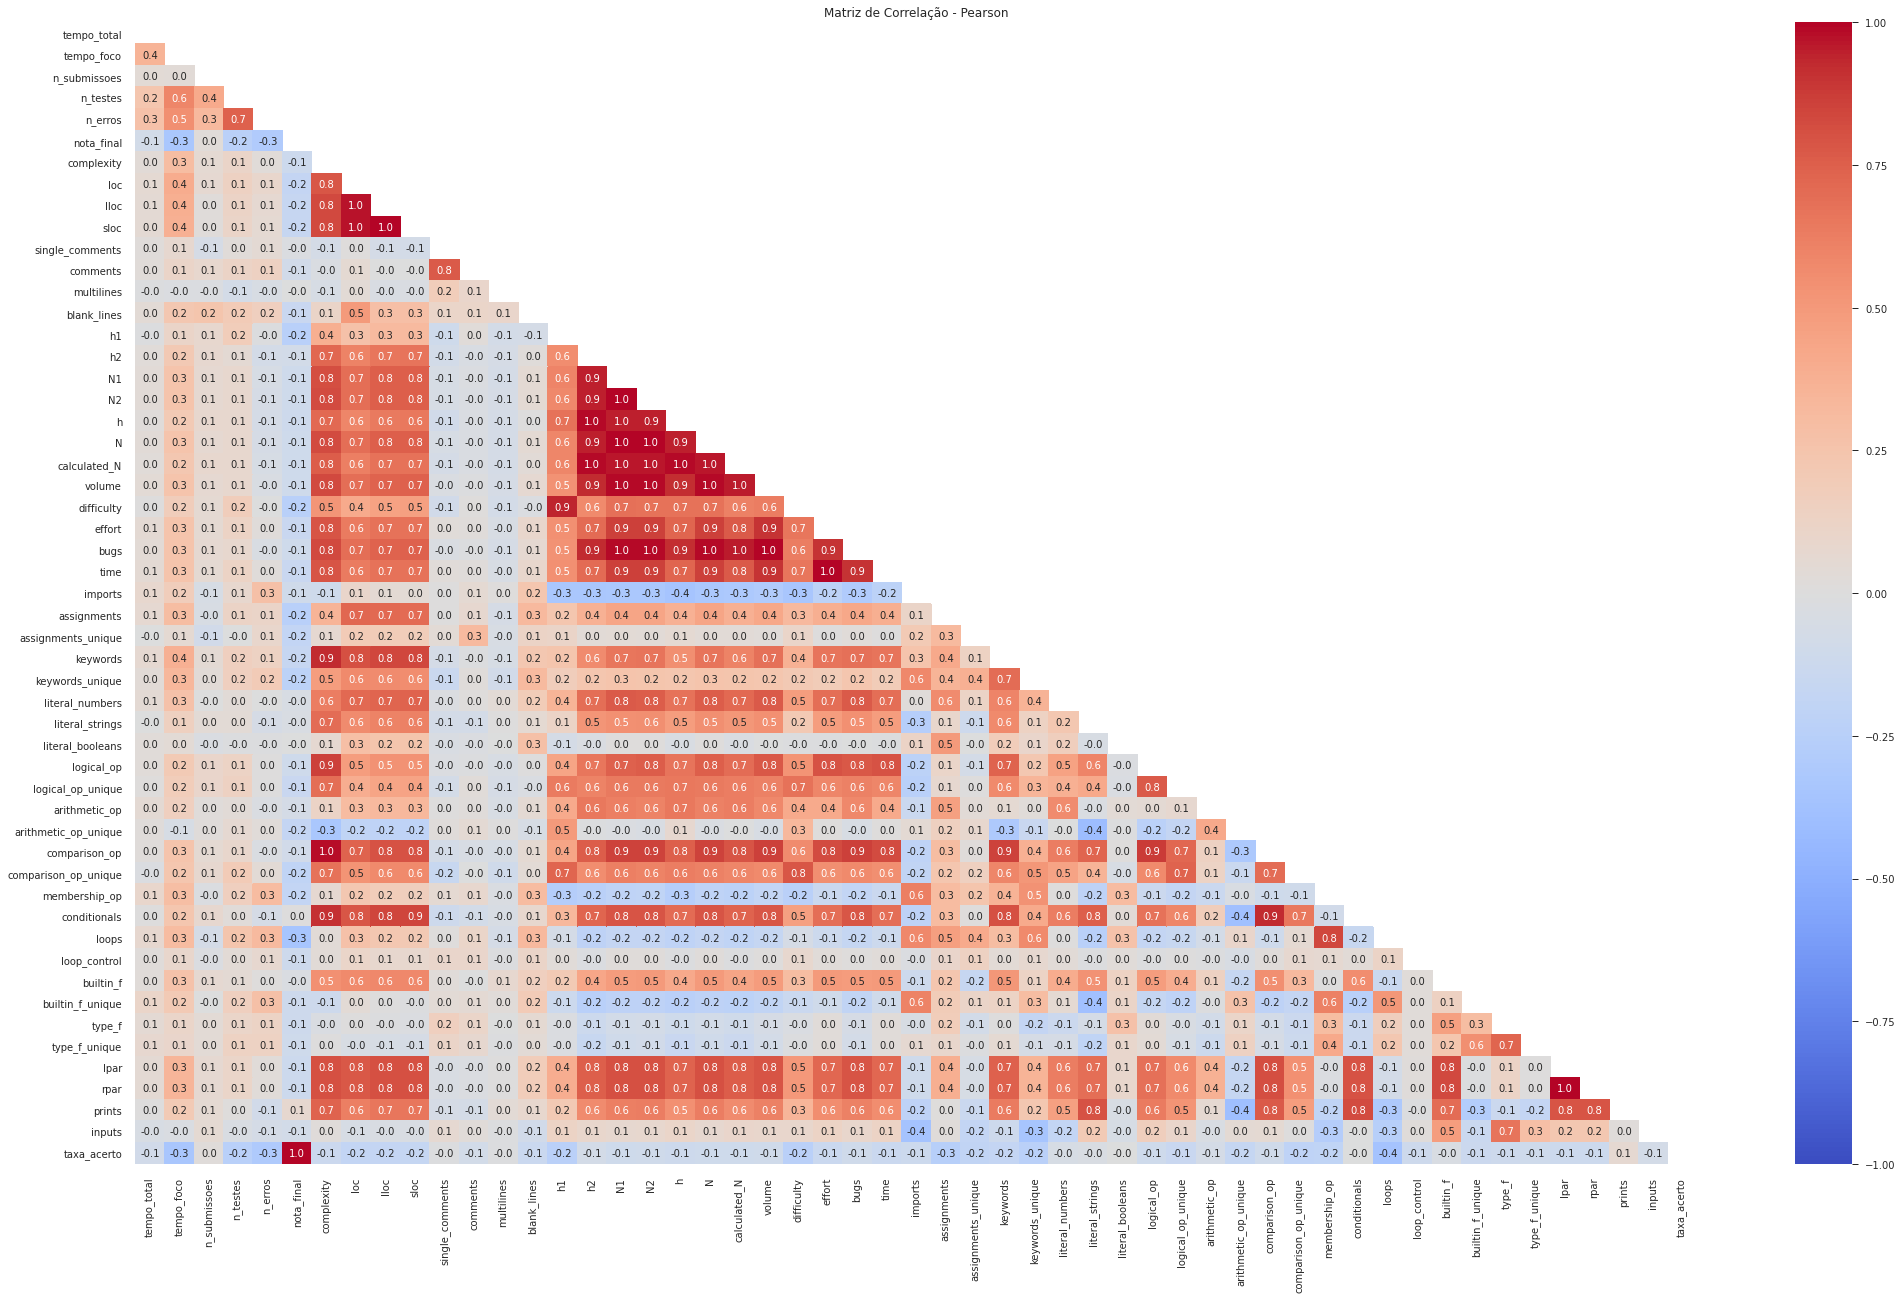

In [0]:
plt.figure(figsize=(35,21))
plt.title(f'Matriz de Correlação - Pearson')
# correlation for one specific feature: subjective_corr[['feature']]
sns.heatmap(corr, mask=mask,annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0, fmt='.1f')
plt.show()

Das features analisas somente `nota_final` possui uma forte correlação positiva com a variável alvo `taxa_acerto`

In [0]:
corr = df.drop(columns=['exercicio'], axis=0).corr('spearman')
mask = np.triu(np.ones(corr.shape)).astype(np.bool)

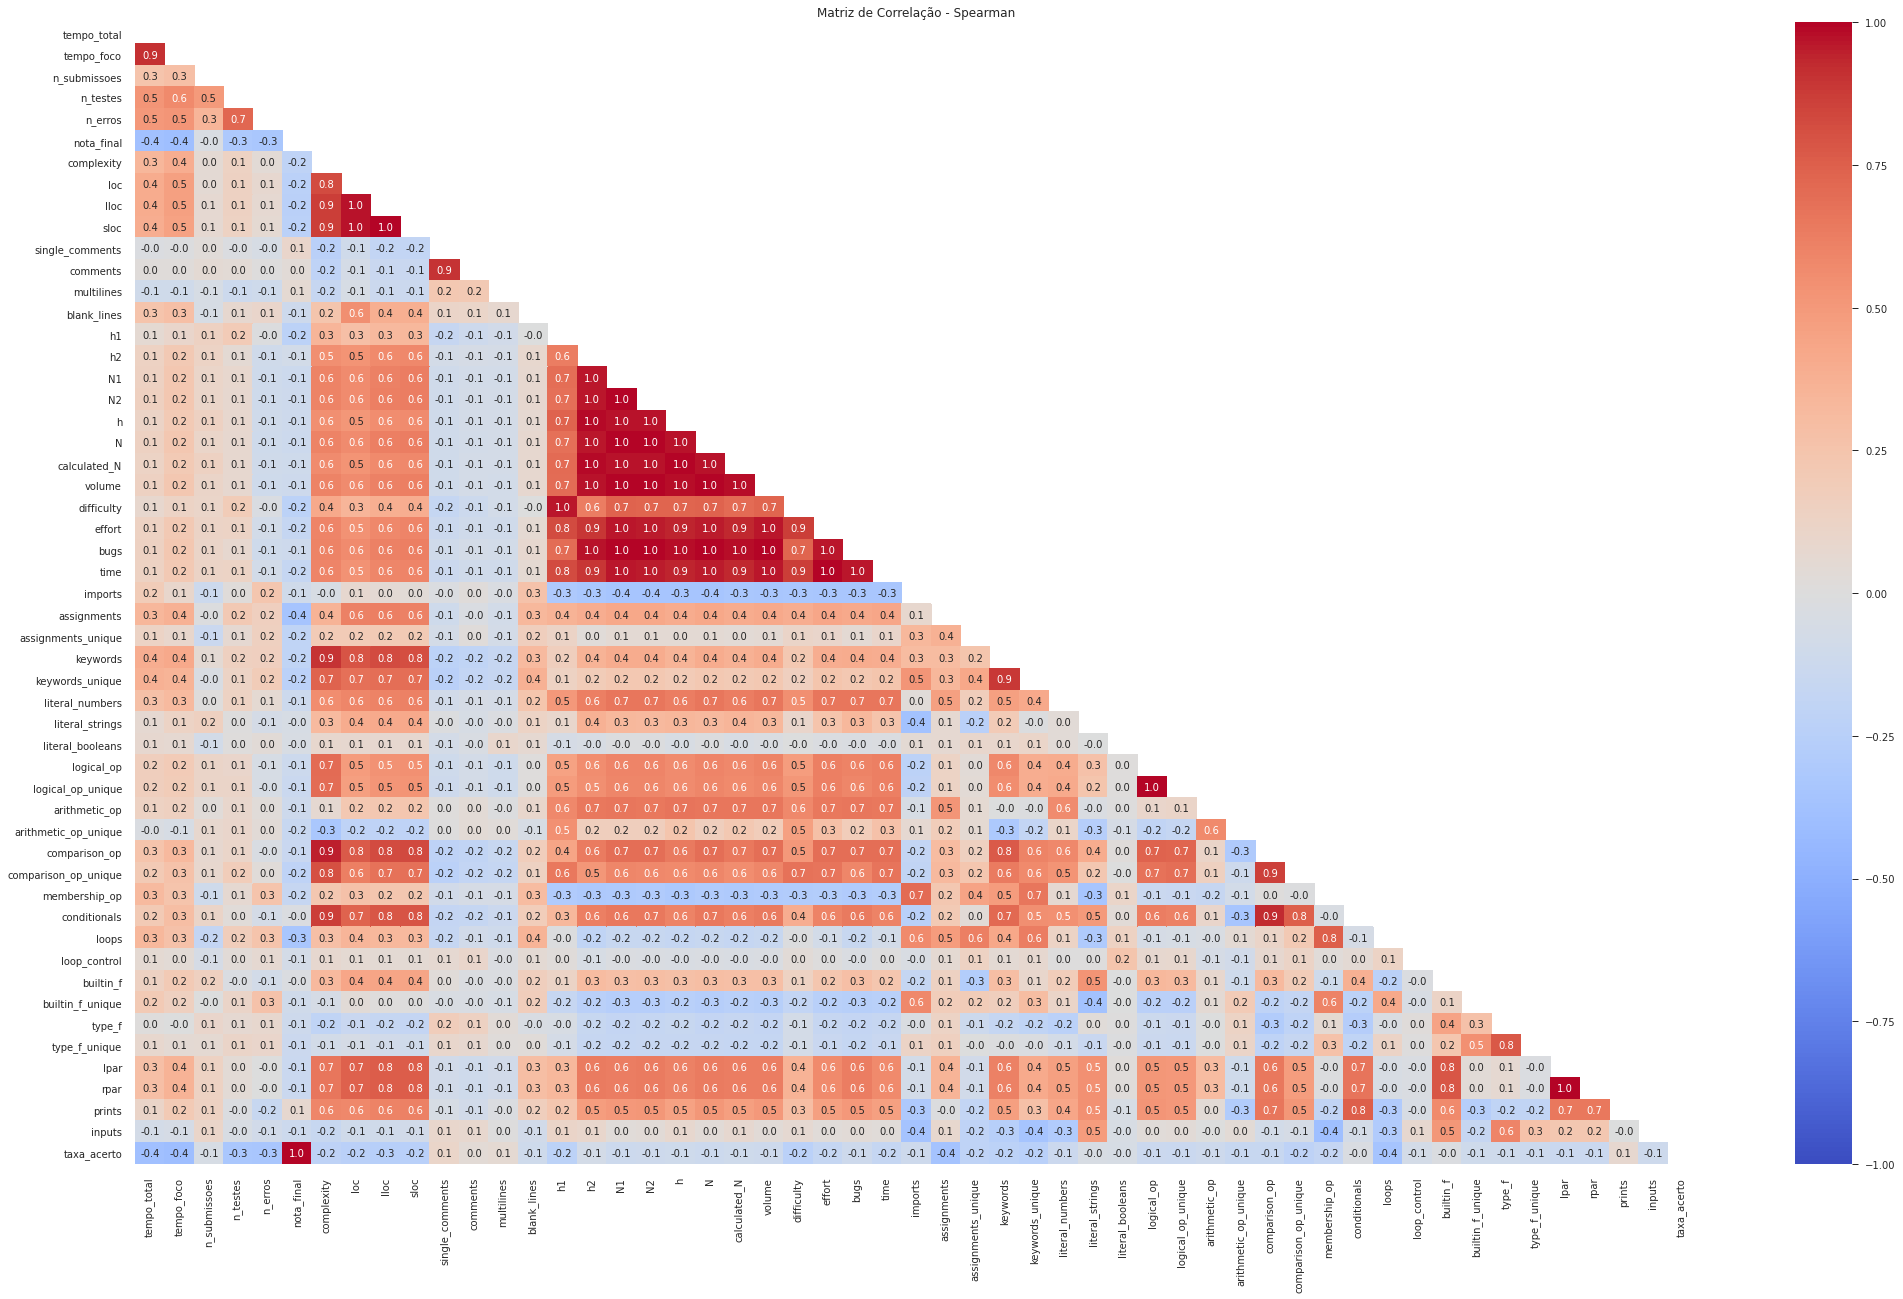

In [0]:
plt.figure(figsize=(35,21))
plt.title(f'Matriz de Correlação - Spearman')
# correlation for one specific feature: subjective_corr[['feature']]
sns.heatmap(corr, mask=mask,annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0, fmt='.1f')
plt.show()

## 6 Modelos

In [0]:
%pip install scikit-plot

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import scikitplot as skplt

from sklearn.model_selection import train_test_split

### 6.1 Normalização dos Dados

In [0]:
# if the distribution is not Gaussian or the STD DEV is very small, it is sensitive to outliers
#from sklearn.preprocessing import MinMaxScaler

# data is normally distributed
#from sklearn.preprocessing import StandardScaler

# uses the interquartile range, rathar than the min-max, so that it is robust to outliers
from sklearn.preprocessing import RobustScaler

# The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
#from sklearn.preprocessing import Normalizer 


scaler = RobustScaler()

In [0]:
df.head()

exercicio  tempo_total  tempo_foco  n_submissoes   n_testes    n_erros  \
0        196    41.130750   16.987433      5.909091  16.636364  15.000000   
1       1002    10.168481    9.842685      1.176471   8.176471   5.000000   
2       1018    11.984919   11.160011      2.466667  15.333333  11.666667   
3       1019    13.483014   13.483014      4.923077  13.538462   9.384615   
4       1020    12.350928   11.960365      6.136364  16.772727  14.727273   

   nota_final  complexity        loc       lloc       sloc  single_comments  \
0   54.545455    3.333333  12.333333  10.666667  10.666667         0.000000   
1   94.117647    1.000000   7.500000   5.875000   5.875000         0.187500   
2   86.666667    1.000000   9.307692   5.923077   5.923077         0.923077   
3  100.000000    1.000000  10.538462   5.769231   5.769231         1.384615   
4   81.818182    1.000000   8.500000   6.833333   6.833333         0.055556   

   comments  multilines  blank_lines        h1        h2        N1        N2  \
0  0.000000         0.0     1.666667  1.166667  4.666667  2.333333  4.666667   
1  0.187500         0.0     1.437500  2.000000  6.000000  3.000000  6.000000   
2  0.923077         0.0     2.461538  2.000000  6.000000  3.000000  6.000000   
3  1.384615         0.0     3.384615  1.000000  4.000000  2.076923  4.153846   
4  0.055556         0.0     1.611111  2.944444  8.000000  4.055556  8.111111   

           h          N  calculated_N     volume  difficulty     effort  \
0   5.833333   7.000000     12.169925  19.972812    0.583333  15.697438   
1   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
2   8.000000   9.000000     17.509775  27.000000    1.000000  27.000000   
3   5.000000   6.230769      8.000000  14.467398    0.519231   7.635571   
4  10.944444  12.166667     28.601838  41.998082    1.493056  62.970887   

       bugs      time   imports  assignments  assignments_unique  keywords  \
0  0.006658  0.872080  2.000000     4.333333                 1.0  7.000000   
1  0.009000  1.500000  1.000000     3.875000                 1.0  1.937500   
2  0.009000  1.500000  0.076923     4.846154                 1.0  0.153846   
3  0.004822  0.424198  0.076923     4.692308                 1.0  0.153846   
4  0.013999  3.498383  0.111111     5.722222                 1.0  0.222222   

   keywords_unique  literal_numbers  literal_strings  literal_booleans  \
0         4.166667         1.333333         6.666667               0.0   
1         1.937500         2.000000         1.500000               0.0   
2         0.153846         2.000000         2.769231               0.0   
3         0.153846         1.000000         2.769231               0.0   
4         0.222222         2.000000         3.777778               0.0   

   logical_op  logical_op_unique  arithmetic_op  arithmetic_op_unique  \
0    0.333333           0.166667       2.000000              1.000000   
1    0.000000           0.000000       3.937500              2.000000   
2    0.000000           0.000000       3.076923              2.000000   
3    0.000000           0.000000       2.153846              1.000000   
4    0.000000           0.000000       4.166667              2.944444   

   comparison_op  comparison_op_unique  membership_op  conditionals     loops  \
0            2.0                   1.0       0.333333           2.0  0.333333   
1            0.0                   0.0       0.000000           0.0  0.000000   
2            0.0                   0.0       0.000000           0.0  0.000000   
3            0.0                   0.0       0.000000           0.0  0.000000   
4            0.0                   0.0       0.000000           0.0  0.000000   

   loop_control  builtin_f  builtin_f_unique    type_f  type_f_unique  \
0           0.0   8.333333          4.166667  2.333333       1.166667   
1           0.0   6.000000          4.000000  2.000000       1.000000   
2           0.0   8.000000          4.000000  3.000000       1.000000   
3

In [0]:
scale_cols = df.columns.drop(['exercicio', 'classificacao', 'taxa_acerto'])

X = pd.DataFrame(scaler.fit_transform(df[scale_cols]), columns=scale_cols)
X

tempo_total  tempo_foco  n_submissoes  n_testes   n_erros  nota_final  \
0       3.758796    0.764326      0.883073  0.381360  1.068321   -0.421028   
1      -0.534298   -0.448741     -0.781517 -0.685785 -0.560604    0.953505   
2      -0.282439   -0.225080     -0.327720  0.216994  0.525346    0.694697   
3      -0.074719    0.169330      0.536265 -0.009414  0.153617    1.157828   
4      -0.231690   -0.089192      0.963011  0.398561  1.023895    0.526285   
..           ...         ...           ...       ...       ...         ...   
651    -0.773359   -0.686158     -0.491859 -0.020000 -0.190394    0.842057   
652    -0.436678   -0.273889      0.022203  0.301088  0.329040   -0.979701   
653     1.269042    0.463642      1.266775  0.066825 -0.071927    0.165404   
654    -0.200469    0.015350     -0.642599 -1.050429 -1.188903    0.661616   
655    -0.181627    0.038422     -0.452778 -0.469777 -0.886389    1.157828   

     complexity       loc      lloc      sloc  single_comments  comments  \
0      0.109062 -0.093473  0.000752  0.015986        -0.283333 -0.356034   
1     -0.654370 -0.711608 -0.690858 -0.664914         0.513542  0.300216   
2     -0.654370 -0.480422 -0.683919 -0.658082         3.639744  2.874735   
3     -0.654370 -0.323019 -0.706124 -0.679944         5.601282  4.490119   
4     -0.654370 -0.583718 -0.552536 -0.528734        -0.047222 -0.161590   
..          ...       ...       ...       ...              ...       ...   
651   -0.261748 -0.558140 -0.470746 -0.448210         0.141667 -0.006034   
652   -0.327185 -0.417461 -0.326410 -0.306109        -0.283333 -0.356034   
653   -0.327185  0.017364 -0.326410 -0.306109         3.116667  2.443966   
654   -0.218123 -0.455828 -0.432256 -0.410316        -0.283333 -0.356034   
655   -0.181770 -0.477143 -0.432256 -0.410316        -0.283333 -0.356034   

     multilines  blank_lines        h1        h2        N1        N2  \
0           0.0    -0.399853 -0.818487 -0.411672 -0.410412 -0.387677   
1           0.0    -0.573929 -0.452239 -0.263523 -0.320905 -0.300784   
2           0.0     0.203934 -0.452239 -0.263523 -0.320905 -0.300784   
3           0.0     0.905106 -0.891736 -0.485746 -0.444838 -0.421097   
4           0.0    -0.442053 -0.037158 -0.041301 -0.179185 -0.163203   
..          ...          ...       ...       ...       ...       ...   
651         0.0    -0.754334 -0.012742 -0.463523 -0.294053 -0.274716   
652         0.0    -0.602414 -0.012742 -0.485746 -0.320905 -0.300784   
653         0.0     1.372554 -0.012742 -0.463523 -0.320905 -0.300784   
654         0.0    -0.273253 -0.012742 -0.448709 -0.276151 -0.257337   
655         0.0    -0.399853 -0.012742 -0.436363 -0.261233 -0.242855   

            h         N  calculated_N    volume  difficulty    effort  \
0   -0.589475 -0.390819     -0.444570 -0.350669   -0.787561 -0.345936   
1   -0.382362 -0.303598     -0.329131 -0.286787   -0.551595 -0.310969   
2   -0.382362 -0.303598     -0.329131 -0.286787   -0.551595 -0.310969   
3   -0.669134 -0.424366     -0.534716 -0.400717   -0.823864 -0.370878   
4   -0.100901 -0.165497     -0.089340 -0.150444   -0.272369 -0.199684   
..        ...       ...           ...       ...         ...       ...   
651 -0.458835 -0.277431     -0.416317 -0.283033    0.173292 -0.200339   
652 -0.477953 -0.303598     -0.431924 -0.302548    0.156302 -0.218624   
653 -0.458835 -0.303598     -0.416317 -0.299396    0.105334 -0.223728   
654 -0.446090 -0.259987     -0.405912 -0.270023    0.184618 -0.188149   
655 -0.435468 -0.245450     -0.397242 -0.259181    0.194057 -0.177991   

         bugs      time   imports  assignments  assignments_unique  keywords  \
0   -0.350669 -0.345936  1.878676    -0.343404                 0.0  0.477670   
1   -0.286787 -0.310969  0.878676    -0.478313                 0.0 -0.414519   
2   -0.286787 -0.310969 -0.044400    -0.192457                 0.0 -0.728862   
3   -0.400717 -0.370878 -0.044400    -0.237742                 0.0 -0.728862   
4   -0.150444

In [0]:
solution_codes = set(df_s.codigo.unique())
len(solution_codes)

660

In [0]:
exercicios_null = df[df.complexity.isnull()]
ex_null_codes = set(exercicios_null.exercicio.unique())
len(ex_null_codes)

16

In [0]:
ex_null_codes - solution_codes

{1548, 1549, 1550, 1612, 1660, 1670, 1671, 2356}

In [0]:
X.isnull().sum()

tempo_total              0
tempo_foco               0
n_submissoes             0
n_testes                 0
n_erros                  0
nota_final               0
complexity              16
loc                     16
lloc                    16
sloc                    16
single_comments         16
comments                16
multilines              16
blank_lines             16
h1                      16
h2                      16
N1                      16
N2                      16
h                       16
N                       16
calculated_N            16
volume                  16
difficulty              16
effort                  16
bugs                    16
time                    16
imports                 16
assignments             16
assignments_unique      16
keywords                16
keywords_unique         16
literal_numbers         16
literal_strings         16
literal_booleans        16
logical_op              16
logical_op_unique       16
arithmetic_op           16
a

In [0]:
y_clean = clean['classificacao']
y_clean

In [0]:
y_clean.isnull().sum()

### 4.x Cross Validation

In [0]:
#Validação Cruzada Estratificada com 10 folds:
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X_clean, y_clean):
    vetor_X_train+=[X_clean[train_index]]
    vetor_X_test+=[X_clean[val_index]]
    vetor_y_train+=[X_clean[train_index]]
    vetor_y_test+=[X_clean[val_index]]

#Treinamento do algoritmo de aprendizagem de máquinba
contador=0
predictions=[]
y_probs = []
while(contador<len(vetor_X_train)):
    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    X_test=vetor_X_test[contador]
    y_test=vetor_y_test[contador]
    
    estimador = LinearRegression()

    y_pred = estimator.predict(X_test)
    y_prob = estimator.predict_proba(X_test)
    predictions+=[y_pred]
    y_probs += [y_prob]
    contador+=1

#validação

y_pred=[]
for i in predictions:
     y_pred+=[i]

y_test=[]
for i in vetor_y_test:
     y_test+=[i]

y_prob=[]
for i in y_probs:
     y_test+=[i]

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

skplt.metrics.plot_roc(y_test, y_prob, figsize=(8,5), title='', text_fontsize=14)

skplt.metrics.plot_precision_recall(y_test, y_prob, figsize=(8,5), title='', text_fontsize=14)

### 4.1 Regressão

In [0]:
target_column = 'taxa_acerto'

In [0]:
# utilizando 30% dos dados para validação
x_train, x_test, y_train, y_test = train_test_split(df, , test_size=.3, random_state=42)

In [0]:
x_train.shape, x_test.shape

In [0]:
y_train.shape, y_test.shape

#### Modelo 01 - LinearRegression

Treinando o modelo:

In [0]:
lr = LinearRegression()
lr

In [0]:
lr.fit(x_train, y_train)

Predição:

In [0]:
y_pred = lr.predict(x_test)
y_pred

Avaliando o Modelo:

TODO: Aplicar métrica RSA

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model Score:', lr.score(x_test, y_test))

#### Modelo 02 - RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators=149, random_state=0)

In [0]:
rf.fit(x_train, y_train)

In [0]:
y_pred = rf.predict(x_test)
y_pred

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model Score:', rf.score(x_test, y_test))

### 4.2 Classificação

#### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
target_column = 'classificacao'

In [0]:
clf = KNeighborsClassifier(n_neighbors=149)

In [0]:
# utilizando 30% dos dados para validação
x_train, x_test, y_train, y_test = train_test_split(df, exams[target_column], test_size=.3, random_state=42)

In [0]:
x_train.shape, x_test.shape

In [0]:
y_train.shape, y_test.shape

In [0]:
clf.fit(x_train, y_train)

In [0]:
y_pred = clf.predict(x_test)
y_pred

In [0]:
print('Accuracy Score :', metrics.accuracy_score(y_test, y_pred))
print('Report : ')
print(metrics.classification_report(y_test, y_pred))

In [0]:
class_names = exams.classificacao.unique()

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred, class_names)
#cm = cm / cm.max()
cm

In [0]:
plt.figure(figsize=(12, 9))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='.0f'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Reais')
ax.set_title('Matriz de Confusão')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names);

In [0]:
error = []
best_i = 40
min_error = 1.0 

# Calculating error for K values between 1 and 500
for i in range(40, 500):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mean_error = np.mean(pred_i != y_test)
    if mean_error < min_error:
        min_error = mean_error
        best_i = i
    error.append(mean_error)

print(best_i, min_error)

In [0]:
plt.figure(figsize=(21, 12))
plt.plot(range(40, 500), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')